In [ ]:
# 네이버 나눔 폰트 설치 (그래프 한글 깨짐)
#실행후 런타임 재시작
import matplotlib.pyplot as plt
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic') 
%config InlineBackend.figure_format = 'retina'

- 데이터 불러오기

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/test/2019.csv', encoding='euc-kr')#한글
df.head(3)

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
0,2019,1,11,1,13,165,65,90.0,1.5,1.2,1.0,1.0,112.0,70.0,93.0,NaN,NaN,NaN,NaN,15.5,1.0,1.0,18.0,32.0,47.0,2.0,NaN,1,0.0,미시행,미시행,미시행,1.0,20191231
1,2019,2,48,2,5,155,45,64.0,1.2,0.5,1.0,1.0,114.0,76.0,89.0,NaN,NaN,NaN,NaN,14.0,1.0,0.5,15.0,8.0,13.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
2,2019,3,41,1,13,160,70,87.0,0.9,0.8,1.0,1.0,109.0,73.0,100.0,232.0,114.0,57.0,152.0,15.6,1.0,1.0,30.0,21.0,17.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231


- 컬럼순서나 컬럼명이 다른 컬럼 확인 후 동일한 컬럼명으로 통일

In [ ]:
df.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상',
       '치석', '데이터 공개일자'],
      dtype='object')

In [ ]:
df = df[['기준년도', '성별코드', '연령대 코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부']]

In [ ]:
df.columns = ['HCHK_YEAR', 'SEX', 'AGE_GROUP', 'SIDO', 'HEIGHT', 'WEIGHT', 'WAIST','BP_HIGH','BP_LWST','BLDS',
     'TOT_CHOLE','TRIGLYCERIDE','HDL_CHOLE','LDL_CHOLE','HMG','OLIG_PROTE_CD','CREATININE','SGOT_AST','SGPT_ALT','GAMMA_GTP', 
     'SMK_STAT_TYPE_CD','DRK_YN']
df.head()

,HCHK_YEAR,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN
0,2019,1,13,11,165,65,90.0,112.0,70.0,93.0,NaN,NaN,NaN,NaN,15.5,1.0,1.0,18.0,32.0,47.0,2.0,NaN
1,2019,2,5,48,155,45,64.0,114.0,76.0,89.0,NaN,NaN,NaN,NaN,14.0,1.0,0.5,15.0,8.0,13.0,1.0,1.0
2,2019,1,13,41,160,70,87.0,109.0,73.0,100.0,232.0,114.0,57.0,152.0,15.6,1.0,1.0,30.0,21.0,17.0,1.0,1.0
3,2019,1,12,28,170,60,85.0,131.0,85.0,85.0,NaN,NaN,NaN,NaN,14.5,1.0,0.7,17.0,19.0,32.0,2.0,1.0
4,2019,1,10,41,170,70,81.2,112.0,66.0,91.0,NaN,NaN,NaN,NaN,14.9,1.0,0.9,19.0,24.0,19.0,2.0,NaN


In [ ]:
#데이터 저장
df.to_csv('/content/drive/MyDrive/test/h19.csv', encoding='euc-kr', index=False)

In [ ]:
#12~19년도 데이터 합침
h12=pd.read_csv('/content/drive/MyDrive/test/h12.csv', encoding='euc-kr')
h13=pd.read_csv('/content/drive/MyDrive/test/h13.csv', encoding='euc-kr')
h14=pd.read_csv('/content/drive/MyDrive/test/h14.csv', encoding='euc-kr')
h15=pd.read_csv('/content/drive/MyDrive/test/h15.csv', encoding='euc-kr')
h16=pd.read_csv('/content/drive/MyDrive/test/h16.csv', encoding='euc-kr')
h17=pd.read_csv('/content/drive/MyDrive/test/h17.csv', encoding='euc-kr')
h18=pd.read_csv('/content/drive/MyDrive/test/h18.csv', encoding='euc-kr')
h19=pd.read_csv('/content/drive/MyDrive/test/h19.csv', encoding='euc-kr')

In [ ]:
merge = pd.concat([h12,h13,h14,h15,h16,h17,h18,h19], ignore_index=True)
merge

,HCHK_YEAR,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN
0,2012,2,14,46,150.0,45.0,72.0,121.0,76.0,132.0,198.0,64.0,37.0,149.0,10.4,NaN,1.2,25.0,14.0,11.0,1.0,N
1,2012,2,14,45,145.0,30.0,68.0,110.0,70.0,70.0,151.0,102.0,41.0,89.0,9.1,1.0,0.7,28.0,16.0,11.0,1.0,N
2,2012,1,1,26,140.0,40.0,68.0,100.0,70.0,77.0,171.0,96.0,28.0,123.0,13.0,1.0,0.5,33.0,17.0,25.0,1.0,N
3,2012,2,1,11,140.0,40.0,66.0,106.0,62.0,87.0,178.0,59.0,57.0,109.0,13.0,1.0,0.6,11.0,11.0,12.0,1.0,N
4,2012,2,1,28,140.0,40.0,77.0,101.0,63.0,96.0,164.0,160.0,54.0,78.0,11.4,1.0,0.9,25.0,14.0,24.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7999995,2019,1,12,41,170.0,65.0,80.0,116.0,79.0,129.0,NaN,NaN,NaN,NaN,15.7,1.0,1.3,24.0,23.0,21.0,1.0,1
7999996,2019,1,9,11,170.0,55.0,75.0,99.0,61.0,130.0,157.0,50.0,54.0,93.0,15.4,2.0,0.9,16.0,15.0,27.0,2.0,1
7999997,2019,1,13,45,160.0,65.0,92.3,116.0,70.0,102.0,NaN,NaN,NaN,NaN,15.9,1.0,1.0,23.0,28.0,84.0,2.0,1
7999998,2019,1,8,30,170.0,75.0,85.0,112.0,71.0,89.0,NaN,NaN,NaN,NaN,15.3,1.0,1.0,25.0,65.0,29.0,2.0,1


In [ ]:
#합친 데이터 저장
merge.to_csv('/content/drive/MyDrive/test/merge.csv', encoding='euc-kr', index=False)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
#warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#합친 데이터 불러오기
df=pd.read_csv('/content/drive/MyDrive/test/merge.csv', encoding='euc-kr')
df.head(1)

,HCHK_YEAR,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN
0,2012,2,14,46,150.0,45.0,72.0,121.0,76.0,132.0,198.0,64.0,37.0,149.0,10.4,NaN,1.2,25.0,14.0,11.0,1.0,N


In [ ]:
df.shape

(8000000, 22)

In [ ]:
df.columns

Index(['HCHK_YEAR', 'SEX', 'AGE_GROUP', 'SIDO', 'HEIGHT', 'WEIGHT', 'WAIST',
       'BP_HIGH', 'BP_LWST', 'BLDS', 'TOT_CHOLE', 'TRIGLYCERIDE', 'HDL_CHOLE',
       'LDL_CHOLE', 'HMG', 'OLIG_PROTE_CD', 'CREATININE', 'SGOT_AST',
       'SGPT_ALT', 'GAMMA_GTP', 'SMK_STAT_TYPE_CD', 'DRK_YN'],
      dtype='object')

In [ ]:
#나이 데이터 수치로 바꾸기
df['AGE_GROUP']= np.where(df['HCHK_YEAR']<2014, df['AGE_GROUP']+4,df['AGE_GROUP'])
df['AGE_GROUP'].unique()

array([18,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [ ]:
df['AGE_GROUP']=df['AGE_GROUP']*5-5
df['AGE_GROUP'].unique()

array([85, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])

- 컬럼별 데이터 확인


In [ ]:
print('HCHK_YEAR',df['HCHK_YEAR'].unique())#2012~2019
print('SEX', df['SEX'].unique())#1남자 2여자
print('AGE_GROUP', df['AGE_GROUP'].unique())#20~85
print('SIDO', df['SIDO'].unique())#50오기 -> 49변경
print('HEIGHT', df['HEIGHT'].unique())#NA값 100~205
print('WEIGHT', df['WEIGHT'].unique())#NA값 20~175
print('OLIG_PROTE_CD', df['OLIG_PROTE_CD'].unique())#NA값 1:- 2:+- 3:1 4:2 5:3 6:4
print('SMK_STAT_TYPE_CD', df['SMK_STAT_TYPE_CD'].unique())#NA값 1안핌 2끊음 3핌 -> 0안핌 1핌 변경
print('DRK_YN', df['DRK_YN'].unique())#NA값, N,Y 문자형->숫자 인코딩 0안마심 1마심

HCHK_YEAR [2012 2013 2014 2015 2016 2017 2018 2019]
SEX [2 1]
AGE_GROUP [85 20 25 30 35 40 45 50 55 60 65 70 75 80]
SIDO [46 45 26 11 28 41 47 44 43 27 42 30 48 31 29 49 36 50]
HEIGHT [150. 145. 140. 155. 160. 165. 170. 175. 180. 185. 190. 135. 130. 120.
 125. 195. 200.  nan 105. 110. 115. 100. 205.]
WEIGHT [ 45.  30.  40.  35.  50.  55.  60.  75.  65.  70.  80.  85. 100. 115.
  90.  95. 105. 110. 120. 125.  25. 130. 135. 140. 145. 170.  nan 155.
 150. 160. 165.  20. 175.]
OLIG_PROTE_CD [nan  1.  3.  4.  2.  5.  6.]
SMK_STAT_TYPE_CD [ 1.  3.  2. nan]
DRK_YN ['N' 'Y' nan '1.0' 1.0 0.0]


In [ ]:
#시도 데이터 50->49로 변환
df['SIDO']= np.where(df['SIDO']==50, df['SIDO']-1,df['SIDO'])
df['SIDO'].unique()

array([46, 45, 26, 11, 28, 41, 47, 44, 43, 27, 42, 30, 48, 31, 29, 49, 36])

In [ ]:
#음주 데이터 N,Y값 0,1로 변경
df['DRK_YN']= np.where(df['DRK_YN']==1.0,1,df['DRK_YN'])
df['DRK_YN']= np.where(df['DRK_YN']=='1.0',1,df['DRK_YN'])
df['DRK_YN']= np.where(df['DRK_YN']==0.0,0,df['DRK_YN'])
df['DRK_YN']= np.where(df['DRK_YN']=='N',0,df['DRK_YN'])
df['DRK_YN']= np.where(df['DRK_YN']=='Y',1,df['DRK_YN'])
print('DRK_YN', df['DRK_YN'].unique())
df['DRK_YN']=df['DRK_YN'].astype(float)

DRK_YN [0 1 nan]


In [ ]:
#흡연 데이터 1,2를 0으로 합치기 
#0:안핌 1:핌
df['SMK_STAT_TYPE_CD']= np.where(df['SMK_STAT_TYPE_CD']==2,1,df['SMK_STAT_TYPE_CD'])
df['SMK_STAT_TYPE_CD']= np.where(df['SMK_STAT_TYPE_CD']==1,0,df['SMK_STAT_TYPE_CD'])
df['SMK_STAT_TYPE_CD']= np.where(df['SMK_STAT_TYPE_CD']==3,1,df['SMK_STAT_TYPE_CD'])
print('SMK_STAT_TYPE_CD', df['SMK_STAT_TYPE_CD'].unique())

SMK_STAT_TYPE_CD [ 0.  1. nan]


In [ ]:
#성별 데이터 1,2를 0,1로 바꾸기
#0:남자 1:여자
df['SEX']= np.where(df['SEX']==1,0,df['SEX'])
df['SEX']= np.where(df['SEX']==2,1,df['SEX'])
print('SEX', df['SEX'].unique())

SEX [1 0]


In [ ]:
#결측값 확인 1백만개 넘는 결측치들은 특정 년도의 데이터가 누락
df.isna().sum()

HCHK_YEAR                 0
SEX                       0
AGE_GROUP                 0
SIDO                      0
HEIGHT                  897
WEIGHT                  897
WAIST                  1276
BP_HIGH               11261
BP_LWST               11262
BLDS                  11528
TOT_CHOLE           1333781
TRIGLYCERIDE        1333797
HDL_CHOLE           1333804
LDL_CHOLE           1376315
HMG                   11551
OLIG_PROTE_CD         48053
CREATININE            11520
SGOT_AST              11511
SGPT_ALT              11514
GAMMA_GTP             11524
SMK_STAT_TYPE_CD       1670
DRK_YN              1712654
dtype: int64

In [ ]:
df.columns.nunique()

22

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


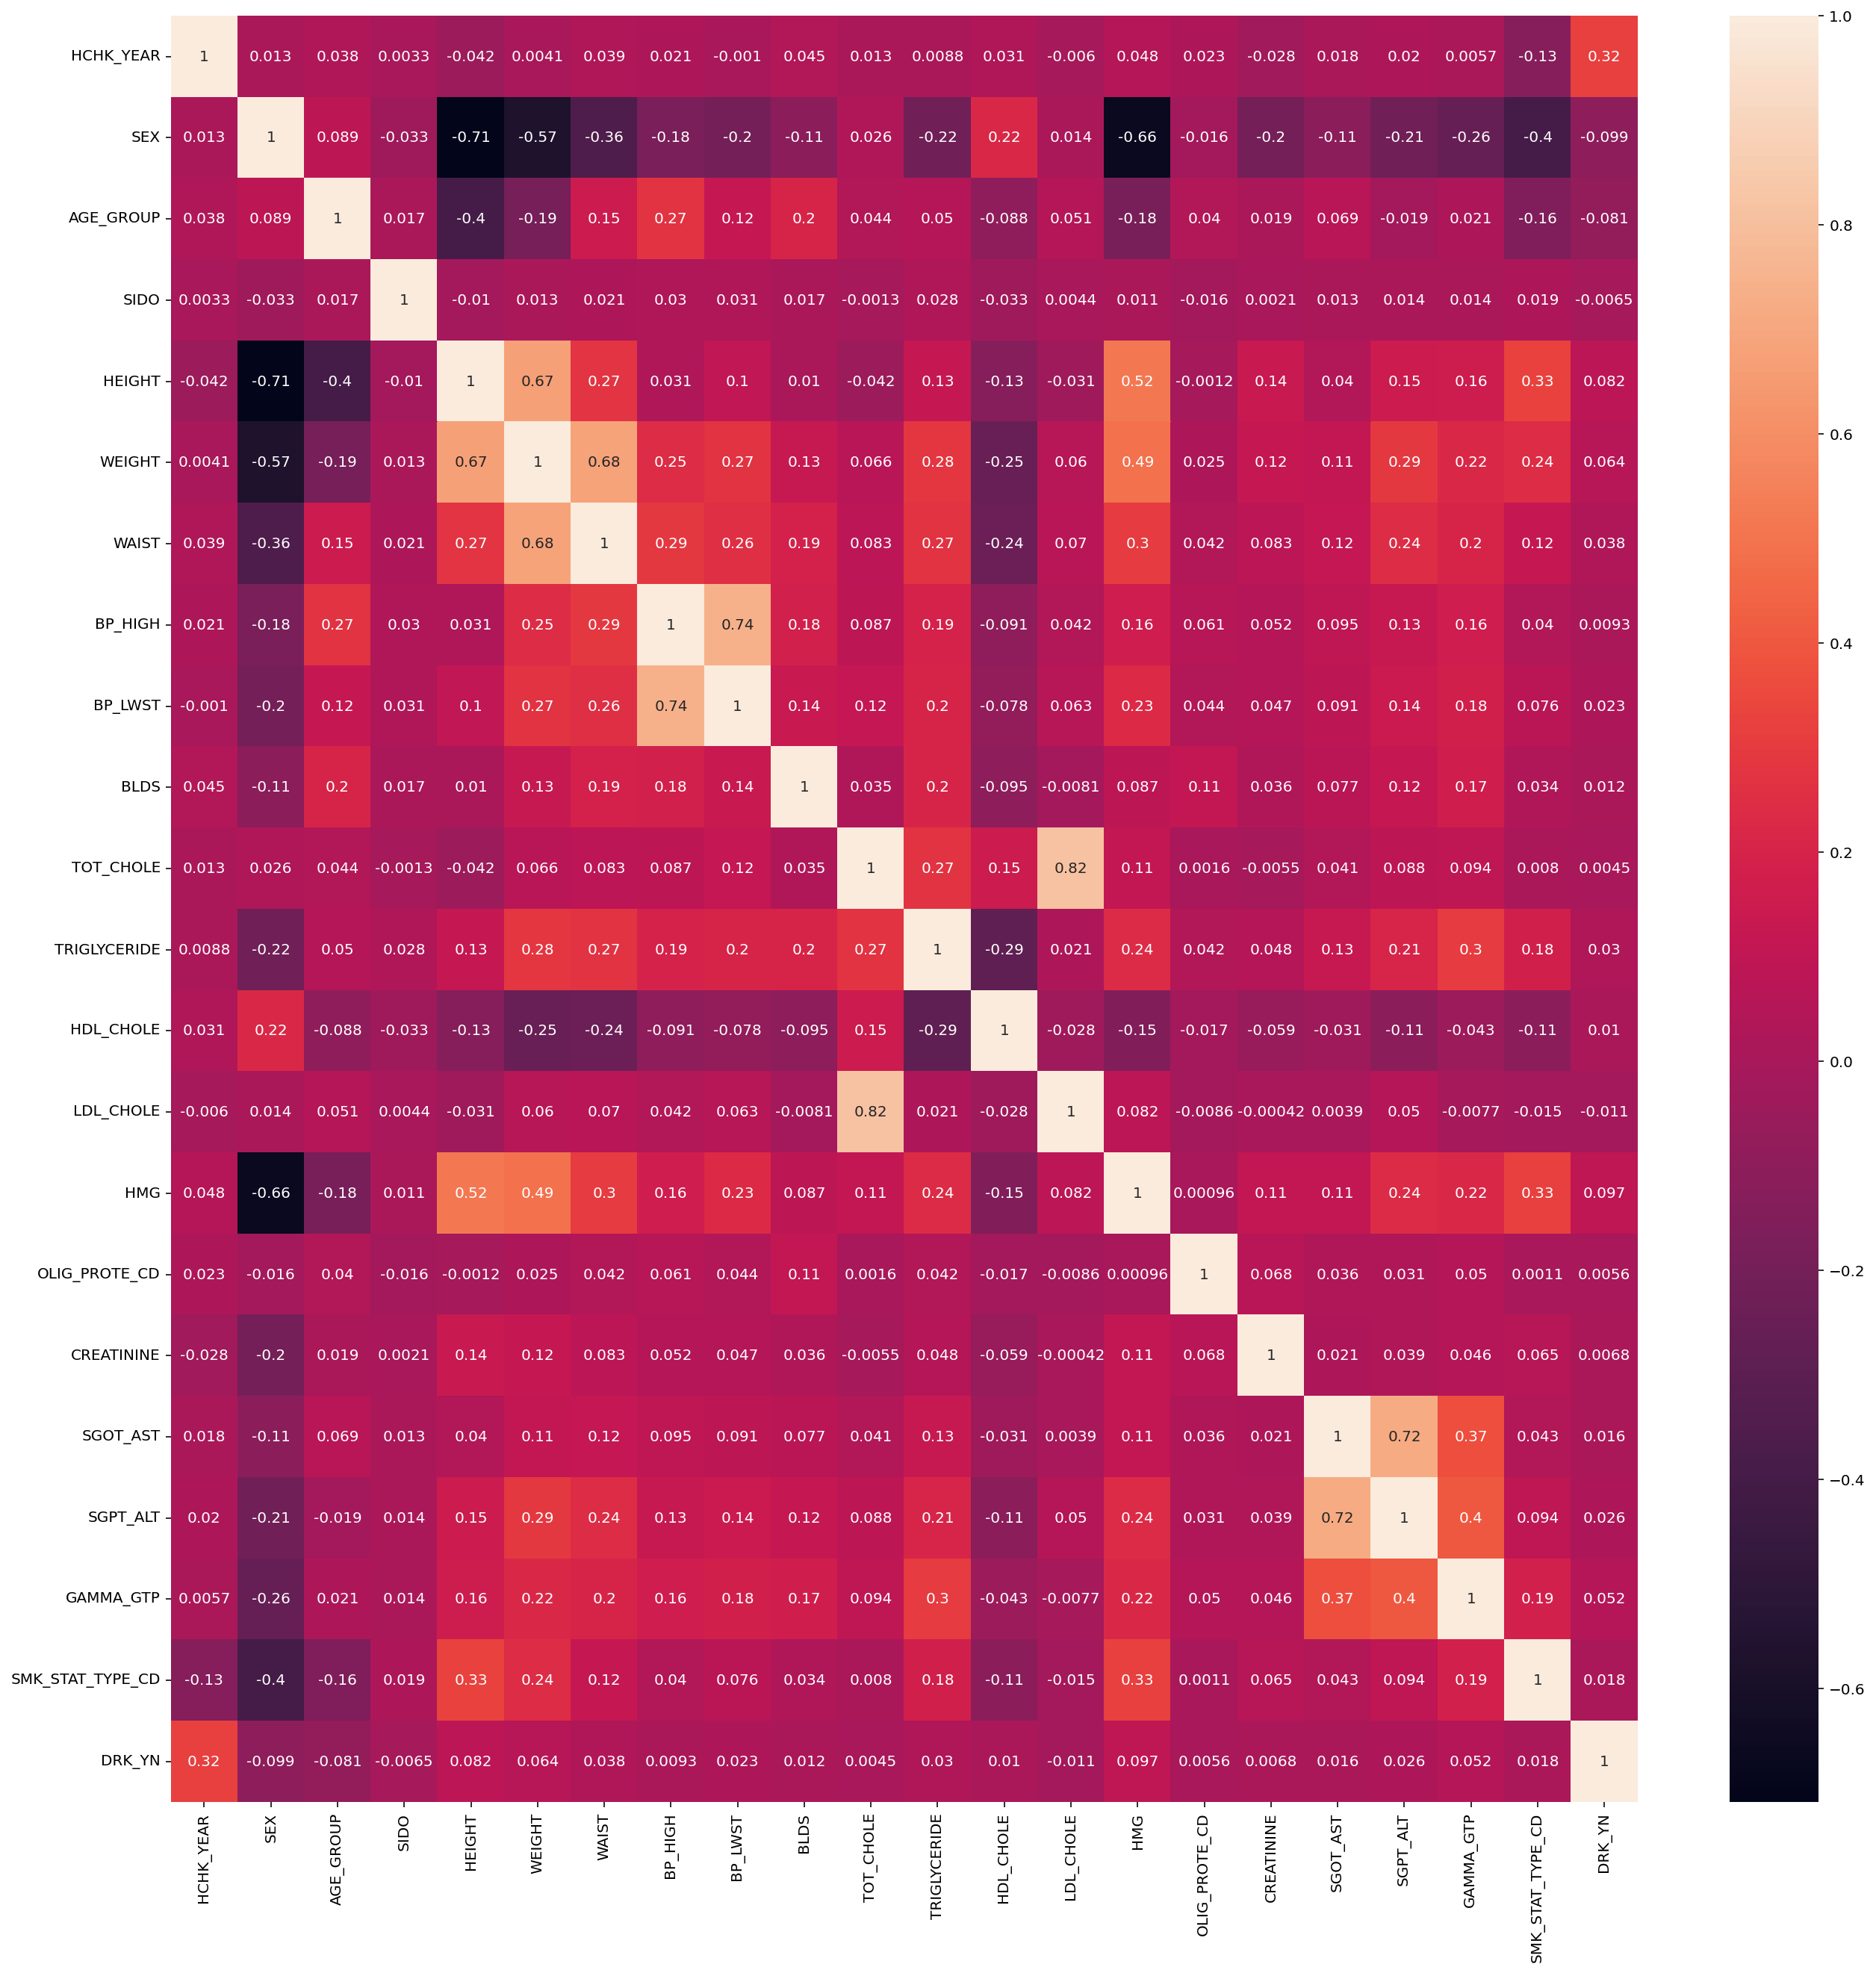

In [ ]:
#전체 변수의 상관관계 확인
#간장질환에 관련된 변수 AST,ALT,GTP가 0.37,0.4,0.72 상관성 보임
#신장질환에 관련된 변수 PROTE과 CREATININE은 0.068로 상관성 보이지 않음
#심혈관계질환에 관련된 변수 TOT,HDL,LDL,TRIGLYCERIDE는 0.27,0.15,0.82,-0.29,0.021,-0.028
corrmat = df.corr()
fig= plt.figure(figsize=(22,22))
sns.heatmap(corrmat, annot=True)
plt.show()

In [ ]:
#상관관계 DF
corrmat = df.corr()
corrmat = corrmat.apply(lambda x: round(x ,2))
corrmat

,HCHK_YEAR,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN
HCHK_YEAR,1.00,0.01,0.04,0.00,-0.04,0.00,0.04,0.02,-0.00,0.04,0.01,0.01,0.03,-0.01,0.05,0.02,-0.03,0.02,0.02,0.01,-0.13,0.32
SEX,0.01,1.00,0.09,-0.03,-0.71,-0.57,-0.36,-0.18,-0.20,-0.11,0.03,-0.22,0.22,0.01,-0.66,-0.02,-0.20,-0.11,-0.21,-0.26,-0.40,-0.10
AGE_GROUP,0.04,0.09,1.00,0.02,-0.40,-0.19,0.15,0.27,0.12,0.20,0.04,0.05,-0.09,0.05,-0.18,0.04,0.02,0.07,-0.02,0.02,-0.16,-0.08
SIDO,0.00,-0.03,0.02,1.00,-0.01,0.01,0.02,0.03,0.03,0.02,-0.00,0.03,-0.03,0.00,0.01,-0.02,0.00,0.01,0.01,0.01,0.02,-0.01
HEIGHT,-0.04,-0.71,-0.40,-0.01,1.00,0.67,0.27,0.03,0.10,0.01,-0.04,0.13,-0.13,-0.03,0.52,-0.00,0.14,0.04,0.15,0.16,0.33,0.08
WEIGHT,0.00,-0.57,-0.19,0.01,0.67,1.00,0.68,0.25,0.27,0.13,0.07,0.28,-0.25,0.06,0.49,0.03,0.12,0.11,0.29,0.22,0.24,0.06
WAIST,0.04,-0.36,0.15,0.02,0.27,0.68,1.00,0.29,0.26,0.19,0.08,0.27,-0.24,0.07,0.30,0.04,0.08,0.12,0.24,0.20,0.12,0.04
BP_HIGH,0.02,-0.18,0.27,0.03,0.03,0.25,0.29,1.00,0.74,0.18,0.09,0.19,-0.09,0.04,0.16,0.06,0.05,0.10,0.13,0.16,0.04,0.01
BP_LWST,-0.00,-0.20,0.12,0.03,0.10,0.27,0.26,0.74,1.00,0.14,0.12,0.20,-0.08,0.06,0.23,0.04,0.05,0.09,0.14,0.18,0.08,0.02
BLDS,0.04,-0.11,0.20,0.02,0.01,0.13,0.19,0.18,0.14,1.00,0.04,0.20,-0.10,-0.01,0.09,0.11,0.04,0.08,0.12,0.17,0.03,0.01


In [ ]:
#상관관계 시리즈
s = corrmat.unstack()
s

HCHK_YEAR  HCHK_YEAR           1.00
           SEX                 0.01
           AGE_GROUP           0.04
           SIDO                0.00
           HEIGHT             -0.04
                               ... 
DRK_YN     SGOT_AST            0.02
           SGPT_ALT            0.03
           GAMMA_GTP           0.05
           SMK_STAT_TYPE_CD    0.02
           DRK_YN              1.00
Length: 484, dtype: float64

In [ ]:
#DataFrame의 style프로퍼티를 사용하여 출력 데이터를 시각화
#관계계수가 높은 순(Descending)부터 정렬하여 Styling처리. ( 1 은 자신과의 관계이므로 제외 )
corrmat2 = pd.DataFrame(s[s < 1].sort_values(ascending=False), columns=['corr'])
corrmat2.style.background_gradient(cmap='viridis')

,,corr
TOT_CHOLE,LDL_CHOLE,0.820000
LDL_CHOLE,TOT_CHOLE,0.820000
BP_LWST,BP_HIGH,0.740000
BP_HIGH,BP_LWST,0.740000
SGOT_AST,SGPT_ALT,0.720000
SGPT_ALT,SGOT_AST,0.720000
WEIGHT,WAIST,0.680000
WAIST,WEIGHT,0.680000
WEIGHT,HEIGHT,0.670000
HEIGHT,WEIGHT,0.670000


In [ ]:
#파생변수 비만도 생성
df['BMI'] = (df['WEIGHT']/df['HEIGHT']/df['HEIGHT'])*10000
df['BMI']

0          20.000000
1          14.268728
2          20.408163
3          20.408163
4          20.408163
             ...    
7999995    22.491349
7999996    19.031142
7999997    25.390625
7999998    25.951557
7999999    27.055151
Name: BMI, Length: 8000000, dtype: float64

In [ ]:
#파생변수 추정사구체여과율 생성
df['eGFR'] = np.where(df['SEX']>1, 175*df['CREATININE']**-1.154*df['AGE_GROUP']**-0.203*0.742, 
                        175*df['CREATININE']**-1.154*df['AGE_GROUP']**-0.203)
df['eGFR']

0           57.542781
1          107.182250
2          211.991074
3          171.768062
4          107.580387
              ...    
7999995     57.313086
7999996     93.459621
7999997     76.220772
7999998     85.033927
7999999    121.953079
Name: eGFR, Length: 8000000, dtype: float64

In [ ]:
df.columns

Index(['HCHK_YEAR', 'SEX', 'AGE_GROUP', 'SIDO', 'HEIGHT', 'WEIGHT', 'WAIST',
       'BP_HIGH', 'BP_LWST', 'BLDS', 'TOT_CHOLE', 'TRIGLYCERIDE', 'HDL_CHOLE',
       'LDL_CHOLE', 'HMG', 'OLIG_PROTE_CD', 'CREATININE', 'SGOT_AST',
       'SGPT_ALT', 'GAMMA_GTP', 'SMK_STAT_TYPE_CD', 'DRK_YN', 'BMI', 'eGFR'],
      dtype='object')

In [ ]:
#아산병원 정보
#당뇨병 https://www.amc.seoul.kr/asan/healthinfo/disease/diseaseDetail.do?contentId=31596
#정상수치 : 공복혈당 126 미만
#0:정상 1:의심
df['diabetes2'] = np.where(df['BLDS']>=126, 1,0)
df['diabetes2']

0          1
1          0
2          0
3          0
4          0
          ..
7999995    1
7999996    1
7999997    0
7999998    0
7999999    0
Name: diabetes2, Length: 8000000, dtype: int64

In [ ]:
print('diabetes2', df['diabetes2'].unique())
print('diabetes2', df['diabetes2'].value_counts(dropna=False))

diabetes2 [1 0]
diabetes2 0    7420268
1     579732
Name: diabetes2, dtype: int64


In [ ]:
#빈혈 https://www.amc.seoul.kr/asan/healthinfo/management/managementDetail.do?managementId=119
#정상수치 : 혈색소(헤모글로빈) 남자일 때 13~17, 여자일 때 12~16 
#0:정상 1:의심
conditions = [
             (df['SEX'] == 1) & (df['HMG']<13),
             (df['SEX'] == 2) & (df['HMG']<12),
             (df['SEX'] == 1) & (df['HMG']>17),
             (df['SEX'] == 2) & (df['HMG']>16),
]
vals = [1, 1, 1, 1]

df['anemia2'] = np.select(conditions, vals)
df['anemia2']

0          1
1          1
2          0
3          0
4          1
          ..
7999995    0
7999996    0
7999997    0
7999998    0
7999999    0
Name: anemia2, Length: 8000000, dtype: int64

In [ ]:
print('anemia2', df['anemia2'].unique())
print('anemia2', df['anemia2'].value_counts(dropna=False))

anemia2 [1 0]
anemia2 0    6403282
1    1596718
Name: anemia2, dtype: int64


In [ ]:
#간수치 http://amc.seoul.kr/asan/mobile/healthinfo/management/managementDetail.do?managementId=36
#정상수치 : AST&ALT 40이하, GTP 남자일 때 10~71, 여자일 때 6~42
#0:정상 1:의심
conditions = [
             (df['SEX'] == 1) & (df['GAMMA_GTP']<10) & (df['SGOT_AST']>40) & (df['SGPT_ALT']>40),
             (df['SEX'] == 1) & (df['GAMMA_GTP']>71) & (df['SGOT_AST']>40) & (df['SGPT_ALT']>40),
             (df['SEX'] == 2) & (df['GAMMA_GTP']<6) & (df['SGOT_AST']>40) & (df['SGPT_ALT']>40),
             (df['SEX'] == 2) & (df['GAMMA_GTP']>42) & (df['SGOT_AST']>40) & (df['SGPT_ALT']>40)
]
vals = [1, 1, 1, 1]

df['liver2'] = np.select(conditions, vals)
df['liver2']

0          0
1          0
2          0
3          0
4          0
          ..
7999995    0
7999996    0
7999997    0
7999998    0
7999999    0
Name: liver2, Length: 8000000, dtype: int64

In [ ]:
print('liver2', df['liver2'].unique())
print('liver2', df['liver2'].value_counts(dropna=False))

liver2 [0 1]
liver2 0    7967983
1      32017
Name: liver2, dtype: int64


In [ ]:
#고혈압 https://www.amc.seoul.kr/asan/healthinfo/disease/diseaseDetail.do?contentId=31322
# ① 정상 혈압 : 수축기 혈압 120mmHg 미만, 확장기 혈압 80mmHg 미만
# ② 고혈압 전 단계 : 수축기 혈압 120~139mmHg이거나, 확장기 혈압 80~89mmHg
# ③ 1기 고혈압(경도 고혈압) : 수축기 혈압 140~159mmHg이거나, 확장기 혈압 90~99mmHg
# ④ 2기 고혈압(중등도 이상 고혈압) : 수축기 혈압 160mmHg 이상이거나, 확장기 혈압 100mmHg 이상

#0:정상 1:고혈압 전 단계 2:경도 고혈압 3:중등도 이상 고혈압
conditions = [
             (df['BP_HIGH']<120) & (df['BP_LWST']<80),
             (df['BP_HIGH']<140) & (df['BP_LWST']<90),
             (df['BP_HIGH']<160) & (df['BP_LWST']<100),
             (df['BP_HIGH']>=160) & (df['BP_LWST']>=100)
]
vals = [0,1,2,3]

df['hypertension2'] = np.select(conditions, vals)
df['hypertension2']

0          1
1          0
2          0
3          0
4          0
          ..
7999995    0
7999996    0
7999997    0
7999998    0
7999999    0
Name: hypertension2, Length: 8000000, dtype: int64

In [ ]:
print('hypertension2', df['hypertension2'].unique())
print('hypertension2', df['hypertension2'].value_counts(dropna=False))

hypertension2 [1 0 2 3]
hypertension2 1    3806248
0    3324486
2     808015
3      61251
Name: hypertension2, dtype: int64


In [ ]:
#사구체여과율 https://www.amc.seoul.kr/asan/healthinfo/body/bodyDetail.do?bodyId=133
# 정상 사구체 여과율은 분당 90~120ml
#0:정상 1:의심

conditions = [
             (df['eGFR']<90),
             (df['eGFR']>120)
]
vals = [1, 1]
df['eGFR2'] = np.select(conditions, vals)

In [ ]:
print('eGFR2', df['eGFR2'].unique())
print('eGFR2', df['eGFR2'].value_counts(dropna=False))

eGFR2 [1 0]
eGFR2 1    4947368
0    3052632
Name: eGFR2, dtype: int64


In [ ]:
#체질량지수 https://www.amc.seoul.kr/asan/healthinfo/management/managementDetail.do?managementId=143
# 저체중 <18.5
# 정상 18.5~22.9
# 위험체중 23~24.9
# 1단계 비만 25~29.9
# 2단계 비만 >=30
#0:정상 1:저체중 2:위험체중 3:1단계 비만 4:2단계 비만
conditions = [
             (df['BMI']<18.5),
             (df['BMI']<23),
             (df['BMI']<25),
             (df['BMI']<30),
             (df['BMI']>=30)
]
vals = [1, 0, 2, 3, 4]

df['BMI2'] = np.select(conditions, vals)

In [ ]:
print('BMI2', df['BMI2'].unique())
print('BMI2', df['BMI2'].value_counts(dropna=False))

BMI2 [0 1 2 3 4]
BMI2 0    3177682
3    2299268
2    1824119
1     354977
4     343954
Name: BMI2, dtype: int64


In [ ]:
df.head(1)

,HCHK_YEAR,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,BMI,eGFR,diabetes2,anemia2,liver2,hypertension2,eGFR2,BMI2
0,2012,1,85,46,150.0,45.0,72.0,121.0,76.0,132.0,198.0,64.0,37.0,149.0,10.4,NaN,1.2,25.0,14.0,11.0,0.0,0.0,20.0,57.542781,1,1,0,1,1,0


In [ ]:
df.isna().sum()

HCHK_YEAR                 0
SEX                       0
AGE_GROUP                 0
SIDO                      0
HEIGHT                  897
WEIGHT                  897
WAIST                  1276
BP_HIGH               11261
BP_LWST               11262
BLDS                  11528
TOT_CHOLE           1333781
TRIGLYCERIDE        1333797
HDL_CHOLE           1333804
LDL_CHOLE           1376315
HMG                   11551
OLIG_PROTE_CD         48053
CREATININE            11520
SGOT_AST              11511
SGPT_ALT              11514
GAMMA_GTP             11524
SMK_STAT_TYPE_CD       1670
DRK_YN              1712654
BMI                     898
eGFR                  11520
diabetes2                 0
anemia2                   0
liver2                    0
hypertension2             0
eGFR2                     0
BMI2                      0
dtype: int64

In [ ]:
#결측치가 1백만개 넘는 행 제거 5363799 rows × 30 columns
temp = df.copy()
temp = temp.dropna(how='any' ,subset=['TOT_CHOLE','TRIGLYCERIDE','HDL_CHOLE','LDL_CHOLE','DRK_YN'])

#결측치 평균값(반올림) 대체
temp = temp.fillna(round(df.mean()))
temp

,HCHK_YEAR,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,BMI,eGFR,diabetes2,anemia2,liver2,hypertension2,eGFR2,BMI2
0,2012,1,85,46,150.0,45.0,72.0,121.0,76.0,132.0,198.0,64.0,37.0,149.0,10.4,1.0,1.2,25.0,14.0,11.0,0.0,0.0,20.000000,57.542781,1,1,0,1,1,0
1,2012,1,85,45,145.0,30.0,68.0,110.0,70.0,70.0,151.0,102.0,41.0,89.0,9.1,1.0,0.7,28.0,16.0,11.0,0.0,0.0,14.268728,107.182250,0,1,0,0,0,1
2,2012,0,20,26,140.0,40.0,68.0,100.0,70.0,77.0,171.0,96.0,28.0,123.0,13.0,1.0,0.5,33.0,17.0,25.0,0.0,0.0,20.408163,211.991074,0,0,0,0,1,0
3,2012,1,20,11,140.0,40.0,66.0,106.0,62.0,87.0,178.0,59.0,57.0,109.0,13.0,1.0,0.6,11.0,11.0,12.0,0.0,0.0,20.408163,171.768062,0,0,0,0,1,0
4,2012,1,20,28,140.0,40.0,77.0,101.0,63.0,96.0,164.0,160.0,54.0,78.0,11.4,1.0,0.9,25.0,14.0,24.0,0.0,0.0,20.408163,107.580387,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7999965,2019,0,45,41,175.0,75.0,89.0,124.0,80.0,91.0,180.0,61.0,66.0,102.0,15.9,1.0,1.3,23.0,20.0,31.0,0.0,1.0,24.489796,59.696007,0,0,0,1,1,2
7999967,2019,0,45,26,175.0,80.0,87.0,118.0,62.0,89.0,183.0,86.0,53.0,112.0,16.4,1.0,0.9,17.0,16.0,21.0,0.0,1.0,26.122449,91.251508,0,0,0,0,0,3
7999976,2019,1,60,11,160.0,55.0,76.0,128.0,80.0,119.0,239.0,85.0,68.0,154.0,13.5,1.0,0.7,29.0,24.0,14.0,0.0,1.0,21.484375,115.035056,0,0,0,1,0,0
7999985,2019,0,60,29,165.0,75.0,90.0,111.0,73.0,109.0,206.0,124.0,65.0,116.0,15.1,1.0,1.3,16.0,21.0,20.0,0.0,1.0,27.548209,56.309636,0,0,0,0,1,3


In [ ]:
temp.isna().sum()

HCHK_YEAR           0
SEX                 0
AGE_GROUP           0
SIDO                0
HEIGHT              0
WEIGHT              0
WAIST               0
BP_HIGH             0
BP_LWST             0
BLDS                0
TOT_CHOLE           0
TRIGLYCERIDE        0
HDL_CHOLE           0
LDL_CHOLE           0
HMG                 0
OLIG_PROTE_CD       0
CREATININE          0
SGOT_AST            0
SGPT_ALT            0
GAMMA_GTP           0
SMK_STAT_TYPE_CD    0
DRK_YN              0
BMI                 0
eGFR                0
diabetes2           0
anemia2             0
liver2              0
hypertension2       0
eGFR2               0
BMI2                0
dtype: int64

In [ ]:
#결측치 전부 제거 5339282 rows × 30 columns
# temp = df.copy()
# temp.dropna()

,HCHK_YEAR,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,BMI,eGFR,diabetes2,anemia2,liver2,hypertension2,eGFR2,BMI2
1,2012,2,85,45,145.0,30.0,68.0,110.0,70.0,70.0,151.0,102.0,41.0,89.0,9.1,1.0,0.7,28.0,16.0,11.0,1.0,0.0,14.268728,79.529229,0,1,0,0,1,1
2,2012,1,20,26,140.0,40.0,68.0,100.0,70.0,77.0,171.0,96.0,28.0,123.0,13.0,1.0,0.5,33.0,17.0,25.0,1.0,0.0,20.408163,211.991074,0,0,0,0,1,0
3,2012,2,20,11,140.0,40.0,66.0,106.0,62.0,87.0,178.0,59.0,57.0,109.0,13.0,1.0,0.6,11.0,11.0,12.0,1.0,0.0,20.408163,127.451902,0,0,0,0,1,0
4,2012,2,20,28,140.0,40.0,77.0,101.0,63.0,96.0,164.0,160.0,54.0,78.0,11.4,1.0,0.9,25.0,14.0,24.0,1.0,0.0,20.408163,79.824647,0,1,0,0,1,0
5,2012,2,20,41,140.0,45.0,69.0,100.0,61.0,93.0,164.0,76.0,58.0,90.0,13.0,1.0,1.0,23.0,21.0,17.0,1.0,0.0,22.959184,70.685912,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7999961,2019,1,60,41,160.0,75.0,93.0,130.0,80.0,109.0,191.0,172.0,58.0,99.0,17.1,1.0,0.7,30.0,34.0,86.0,2.0,1.0,29.296875,115.035056,0,1,0,1,0,3
7999967,2019,1,45,26,175.0,80.0,87.0,118.0,62.0,89.0,183.0,86.0,53.0,112.0,16.4,1.0,0.9,17.0,16.0,21.0,2.0,1.0,26.122449,91.251508,0,0,0,0,0,3
7999976,2019,2,60,11,160.0,55.0,76.0,128.0,80.0,119.0,239.0,85.0,68.0,154.0,13.5,1.0,0.7,29.0,24.0,14.0,1.0,1.0,21.484375,85.356011,0,0,0,1,1,0
7999985,2019,1,60,29,165.0,75.0,90.0,111.0,73.0,109.0,206.0,124.0,65.0,116.0,15.1,1.0,1.3,16.0,21.0,20.0,2.0,1.0,27.548209,56.309636,0,0,0,0,1,3


In [ ]:
5363799-5339282 

24517

In [ ]:
#df_na del로 저장
temp.to_csv('/content/drive/MyDrive/test/df_nadel.csv', encoding='euc-kr', index=False)

In [ ]:
#######################################################################################################df_na del 이어서 불러오기
temp=pd.read_csv('/content/drive/MyDrive/test/df_nadel.csv', encoding='euc-kr')
temp.head(1)

,HCHK_YEAR,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,BMI,eGFR,diabetes2,anemia2,liver2,hypertension2,eGFR2,BMI2
0,2012,1,85,46,150.0,45.0,72.0,121.0,76.0,132.0,198.0,64.0,37.0,149.0,10.4,1.0,1.2,25.0,14.0,11.0,0.0,0.0,20.0,57.542781,1,1,0,1,1,0


In [ ]:
temp.columns

Index(['HCHK_YEAR', 'SEX', 'AGE_GROUP', 'SIDO', 'HEIGHT', 'WEIGHT', 'WAIST',
       'BP_HIGH', 'BP_LWST', 'BLDS', 'TOT_CHOLE', 'TRIGLYCERIDE', 'HDL_CHOLE',
       'LDL_CHOLE', 'HMG', 'OLIG_PROTE_CD', 'CREATININE', 'SGOT_AST',
       'SGPT_ALT', 'GAMMA_GTP', 'SMK_STAT_TYPE_CD', 'DRK_YN', 'BMI', 'eGFR',
       'diabetes2', 'anemia2', 'liver2', 'hypertension2', 'eGFR2', 'BMI2'],
      dtype='object')

In [ ]:
#범주형수치/ 수치형데이터로 분리
temp1 = temp[['HCHK_YEAR', 'SEX', 'AGE_GROUP', 'SIDO', 'HEIGHT', 'WEIGHT', 'SMK_STAT_TYPE_CD', 'DRK_YN',
              'diabetes2', 'anemia2', 'liver2', 'hypertension2', 'eGFR2', 'BMI2']]

temp2 = temp[['WAIST','BP_HIGH', 'BP_LWST', 'BLDS', 'TOT_CHOLE', 'TRIGLYCERIDE', 'HDL_CHOLE',
       'LDL_CHOLE', 'HMG', 'OLIG_PROTE_CD', 'CREATININE', 'SGOT_AST',
       'SGPT_ALT', 'GAMMA_GTP',  'BMI', 'eGFR']]

Col_Lst = list(temp2.columns) #컬럼받기
print(len(Col_Lst),'\n',Col_Lst)

16 
 ['WAIST', 'BP_HIGH', 'BP_LWST', 'BLDS', 'TOT_CHOLE', 'TRIGLYCERIDE', 'HDL_CHOLE', 'LDL_CHOLE', 'HMG', 'OLIG_PROTE_CD', 'CREATININE', 'SGOT_AST', 'SGPT_ALT', 'GAMMA_GTP', 'BMI', 'eGFR']


In [ ]:
temp1

,HCHK_YEAR,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,SMK_STAT_TYPE_CD,DRK_YN,diabetes2,anemia2,liver2,hypertension2,eGFR2,BMI2
0,2012,1,85,46,150.0,45.0,0.0,0.0,1,1,0,1,1,0
1,2012,1,85,45,145.0,30.0,0.0,0.0,0,1,0,0,0,1
2,2012,0,20,26,140.0,40.0,0.0,0.0,0,0,0,0,1,0
3,2012,1,20,11,140.0,40.0,0.0,0.0,0,0,0,0,1,0
4,2012,1,20,28,140.0,40.0,0.0,0.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5363794,2019,0,45,41,175.0,75.0,0.0,1.0,0,0,0,1,1,2
5363795,2019,0,45,26,175.0,80.0,0.0,1.0,0,0,0,0,0,3
5363796,2019,1,60,11,160.0,55.0,0.0,1.0,0,0,0,1,0,0
5363797,2019,0,60,29,165.0,75.0,0.0,1.0,0,0,0,0,1,3


In [ ]:
##############################이상치 처리 먼저 하기 수치형 데이터가 'HMG'빼고 다 오른쪽 꼬리가 긴 분포
temp2_log1p = np.log1p(temp2)
temp2_log1p.describe()

,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,BMI,eGFR
count,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06
mean,4.397264e+00,4.805687e+00,4.335710e+00,4.587281e+00,5.259524e+00,4.703627e+00,4.009748e+00,4.694806e+00,2.712217e+00,7.221342e-01,6.237674e-01,3.205066e+00,3.107299e+00,3.316514e+00,3.204117e+00,4.591565e+00
std,1.155605e-01,1.171347e-01,1.279516e-01,1.836601e-01,1.909947e-01,5.634859e-01,2.498184e-01,3.227423e-01,1.115072e-01,1.353124e-01,1.281190e-01,3.507859e-01,5.279753e-01,7.021469e-01,1.347162e-01,3.091581e-01
min,6.931472e-01,4.060443e+00,3.433987e+00,2.708050e+00,3.433987e+00,6.931472e-01,6.931472e-01,6.931472e-01,9.531018e-02,6.931472e-01,5.826891e-02,6.931472e-01,6.931472e-01,6.931472e-01,2.601726e+00,3.090321e-01
25%,4.317488e+00,4.709530e+00,4.262680e+00,4.477337e+00,5.135798e+00,4.304065e+00,3.850148e+00,4.510860e+00,2.646175e+00,6.931472e-01,5.306283e-01,2.995732e+00,2.772589e+00,2.833213e+00,3.112821e+00,4.404333e+00
50%,4.406719e+00,4.795791e+00,4.343805e+00,4.564348e+00,5.262690e+00,4.672829e+00,4.007333e+00,4.727388e+00,2.721295e+00,6.931472e-01,6.418539e-01,3.178054e+00,3.044522e+00,3.178054e+00,3.210086e+00,4.574996e+00
75%,4.477337e+00,4.875197e+00,4.406719e+00,4.653960e+00,5.389072e+00,5.068904e+00,4.174387e+00,4.912655e+00,2.791165e+00,6.931472e-01,6.931472e-01,3.367296e+00,3.401197e+00,3.688879e+00,3.294041e+00,4.771405e+00
max,6.907755e+00,5.707110e+00,5.252273e+00,6.880384e+00,7.779049e+00,9.158099e+00,9.000976e+00,9.210340e+00,3.258097e+00,1.945910e+00,4.614130e+00,9.210340e+00,8.883363e+00,6.907755e+00,3.868593e+00,7.663089e+00


In [ ]:
#수치형 데이터 스케일링
#Scikit-Learn에서는 다양한 종류의 스케일러를 제공하고 있다. 그중 대표적인 기법들이다.
#  	종류	설명
# 1	StandardScaler	기본 스케일. 평균과 표준편차 사용
# 2	MinMaxScaler	최대/최소값이 각각 1, 0이 되도록 스케일링
# 3	MaxAbsScaler	최대절대값과 0이 각각 1, 0이 되도록 스케일링
# 4	RobustScaler	중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화
from sklearn.preprocessing import  StandardScaler
standardScaler = StandardScaler()
from sklearn.preprocessing import RobustScaler
robustScaler = RobustScaler()
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()
from sklearn.preprocessing import MaxAbsScaler
maxAbsScaler = MaxAbsScaler()

In [ ]:
#log1p + StandardScaler
# 객체생성
scaler = StandardScaler()
# fit -> transform
scaler.fit(temp2_log1p) # df는 2차원 이상의 값이어야 함
temp2_log1p_scaled = scaler.transform(temp2_log1p)
# 배열형태로 반환되기 때문에 데이터 프레임으로 변환해주는 작업
temp2_log1p_scaled = pd.DataFrame(data = temp2_log1p_scaled, columns=Col_Lst)
temp2_log1p_scaled.describe()

,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,BMI,eGFR
count,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06
mean,-4.240645e-13,7.888348e-13,-3.727883e-13,-2.310198e-13,-6.696529e-14,-4.263831e-14,-4.481652e-13,-7.080585e-14,-2.494764e-13,-7.796406e-13,-7.338105e-13,-5.713063e-13,-5.864096e-13,1.781114e-14,-1.109947e-12,7.700088e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.205350e+01,-6.362277e+00,-7.047380e+00,-1.023212e+01,-9.558048e+00,-7.117268e+00,-1.327605e+01,-1.239893e+01,-2.346852e+01,-2.142229e-01,-4.413854e+00,-7.160832e+00,-4.572471e+00,-3.736208e+00,-4.471560e+00,-1.385224e+01
25%,-6.903406e-01,-8.209039e-01,-5.707665e-01,-5.986313e-01,-6.477948e-01,-7.090894e-01,-6.388650e-01,-5.699480e-01,-5.922732e-01,-2.142229e-01,-7.269740e-01,-5.967560e-01,-6.339503e-01,-6.883179e-01,-6.776961e-01,-6.056189e-01
50%,8.181931e-02,-8.448401e-02,6.326682e-02,-1.248681e-01,1.657827e-02,-5.465634e-02,-9.665441e-03,1.009535e-01,8.141125e-02,-2.142229e-01,1.411692e-01,-7.700436e-02,-1.189002e-01,-1.971948e-01,4.430454e-02,-5.359357e-02
75%,6.929070e-01,5.934258e-01,5.549672e-01,3.630559e-01,6.782801e-01,6.482457e-01,6.590368e-01,6.749937e-01,7.080050e-01,-2.142229e-01,5.415259e-01,4.624757e-01,5.566522e-01,5.303248e-01,6.675054e-01,5.817079e-01
max,2.172449e+01,7.695614e+00,7.163361e+00,1.248558e+01,1.319159e+01,7.905207e+00,1.997943e+01,1.399115e+01,4.895462e+00,9.044077e+00,3.114575e+01,1.711949e+01,1.094003e+01,5.114659e+00,4.932414e+00,9.935126e+00


In [ ]:
#############################################################log1p + RobustScaler
# 객체생성
scaler = RobustScaler()
# fit -> transform
scaler.fit(temp2_log1p) # df는 2차원 이상의 값이어야 함
temp2_log1p_scaled = scaler.transform(temp2_log1p)
# 배열형태로 반환되기 때문에 데이터 프레임으로 변환해주는 작업
temp2_log1p_scaled = pd.DataFrame(data = temp2_log1p_scaled, columns=Col_Lst)
temp2_log1p_scaled.describe()

,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,BMI,eGFR
count,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06
mean,-5.915016e-02,5.973431e-02,-5.620052e-02,1.298428e-01,-1.250176e-02,4.026739e-02,7.446974e-03,-8.109096e-02,-6.261065e-02,2.898701e-02,-1.112883e-01,7.269832e-02,9.986556e-02,1.618151e-01,-3.293525e-02,4.513801e-02
std,7.229364e-01,7.070488e-01,8.883096e-01,1.039839e+00,7.541053e-01,7.367378e-01,7.704744e-01,8.032505e-01,7.690663e-01,1.353124e-01,7.883329e-01,9.440806e-01,8.399110e-01,8.205852e-01,7.433831e-01,8.422282e-01
min,-2.323179e+01,-4.438705e+00,-6.316455e+00,-1.050991e+01,-7.220276e+00,-5.203293e+00,-1.022141e+01,-1.004054e+01,-1.811145e+01,0.000000e+00,-3.590874e+00,-6.687703e+00,-3.740603e+00,-2.904061e+00,-3.357017e+00,-1.162161e+01
25%,-5.582225e-01,-5.206848e-01,-5.632179e-01,-4.926375e-01,-5.010072e-01,-4.821455e-01,-4.847821e-01,-5.389019e-01,-5.181079e-01,0.000000e+00,-6.843857e-01,-4.906874e-01,-4.325962e-01,-4.030082e-01,-5.367231e-01,-4.649312e-01
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.417775e-01,4.793152e-01,4.367821e-01,5.073625e-01,4.989928e-01,5.178545e-01,5.152179e-01,4.610981e-01,4.818921e-01,0.000000e+00,3.156143e-01,5.093126e-01,5.674038e-01,5.969918e-01,4.632769e-01,5.350688e-01
max,1.564627e+01,5.500909e+00,6.307081e+00,1.311284e+01,9.935349e+00,5.864332e+00,1.540109e+01,1.115730e+01,3.702324e+00,1.252763e+00,2.444193e+01,1.623487e+01,9.288514e+00,4.358828e+00,3.633738e+00,8.412780e+00


In [ ]:
#log1p + MinMaxScaler
# 객체생성
scaler = MinMaxScaler()
# fit -> transform
scaler.fit(temp2_log1p) # df는 2차원 이상의 값이어야 함
temp2_log1p_scaled = scaler.transform(temp2_log1p)
# 배열형태로 반환되기 때문에 데이터 프레임으로 변환해주는 작업
temp2_log1p_scaled = pd.DataFrame(data = temp2_log1p_scaled, columns=Col_Lst)
temp2_log1p_scaled.describe()

,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,BMI,eGFR
count,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06
mean,5.960339e-01,4.525769e-01,4.959192e-01,4.504029e-01,4.201406e-01,4.737747e-01,3.992139e-01,4.698330e-01,8.274057e-01,2.328917e-02,1.241255e-01,2.949233e-01,2.947604e-01,4.221290e-01,4.754968e-01,5.921593e-01
std,1.859497e-02,7.113443e-02,7.036932e-02,4.401855e-02,4.395674e-02,6.656693e-02,3.007023e-02,3.789304e-02,3.525599e-02,1.080028e-01,2.812180e-02,4.118563e-02,6.446415e-02,1.129833e-01,1.063380e-01,3.793423e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.831970e-01,3.941824e-01,4.557548e-01,4.240520e-01,3.916656e-01,4.265728e-01,3.800030e-01,4.482360e-01,8.065245e-01,0.000000e+00,1.036817e-01,2.703455e-01,2.538934e-01,3.443606e-01,4.034319e-01,5.721740e-01
50%,5.975553e-01,4.465672e-01,5.003713e-01,4.449064e-01,4.208693e-01,4.701363e-01,3.989232e-01,4.736585e-01,8.302759e-01,0.000000e+00,1.280954e-01,2.917518e-01,2.870956e-01,3.998493e-01,4.802081e-01,5.916712e-01
75%,6.089185e-01,4.947899e-01,5.349719e-01,4.663841e-01,4.499556e-01,5.169264e-01,4.190313e-01,4.954106e-01,8.523671e-01,0.000000e+00,1.393542e-01,3.139706e-01,3.306446e-01,4.820469e-01,5.464780e-01,6.128909e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
#log1p + MaxAbsScaler
# 객체생성
scaler = MaxAbsScaler()
# fit -> transform
scaler.fit(temp2_log1p) # df는 2차원 이상의 값이어야 함
temp2_log1p_scaled = scaler.transform(temp2_log1p)
# 배열형태로 반환되기 때문에 데이터 프레임으로 변환해주는 작업
temp2_log1p_scaled = pd.DataFrame(data = temp2_log1p_scaled, columns=Col_Lst)
temp2_log1p_scaled.describe()

,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,BMI,eGFR
count,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06
mean,6.365692e-01,8.420525e-01,8.254921e-01,6.667188e-01,6.761140e-01,5.136030e-01,4.454792e-01,5.097321e-01,8.324546e-01,3.712006e-01,1.351864e-01,3.479856e-01,3.497886e-01,4.801145e-01,8.282383e-01,6.053378e-01
std,1.672909e-02,2.052435e-02,2.436118e-02,2.669329e-02,2.455245e-02,6.152870e-02,2.775459e-02,3.504130e-02,3.422463e-02,6.953142e-02,2.776667e-02,3.808610e-02,5.943417e-02,1.016462e-01,3.482305e-02,3.670847e-02
min,1.003433e-01,7.114709e-01,6.538097e-01,3.935900e-01,4.414405e-01,7.568679e-02,7.700800e-02,7.525750e-02,2.925333e-02,3.562072e-01,1.262836e-02,7.525750e-02,7.802757e-02,1.003433e-01,6.725250e-01,3.231285e-02
25%,6.250204e-01,8.252040e-01,8.115876e-01,6.507394e-01,6.602091e-01,4.699736e-01,4.277478e-01,4.897603e-01,8.121843e-01,3.562072e-01,1.150007e-01,3.252575e-01,3.121103e-01,4.101496e-01,8.046389e-01,5.859983e-01
50%,6.379380e-01,8.403185e-01,8.270334e-01,6.633857e-01,6.765211e-01,5.102400e-01,4.452109e-01,5.132696e-01,8.352409e-01,3.562072e-01,1.391062e-01,3.450528e-01,3.427218e-01,4.600704e-01,8.297811e-01,6.048655e-01
75%,6.481609e-01,8.542322e-01,8.390118e-01,6.764100e-01,6.927675e-01,5.534887e-01,4.637705e-01,5.333847e-01,8.566858e-01,3.562072e-01,1.502227e-01,3.655995e-01,3.828727e-01,5.340200e-01,8.514829e-01,6.253995e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


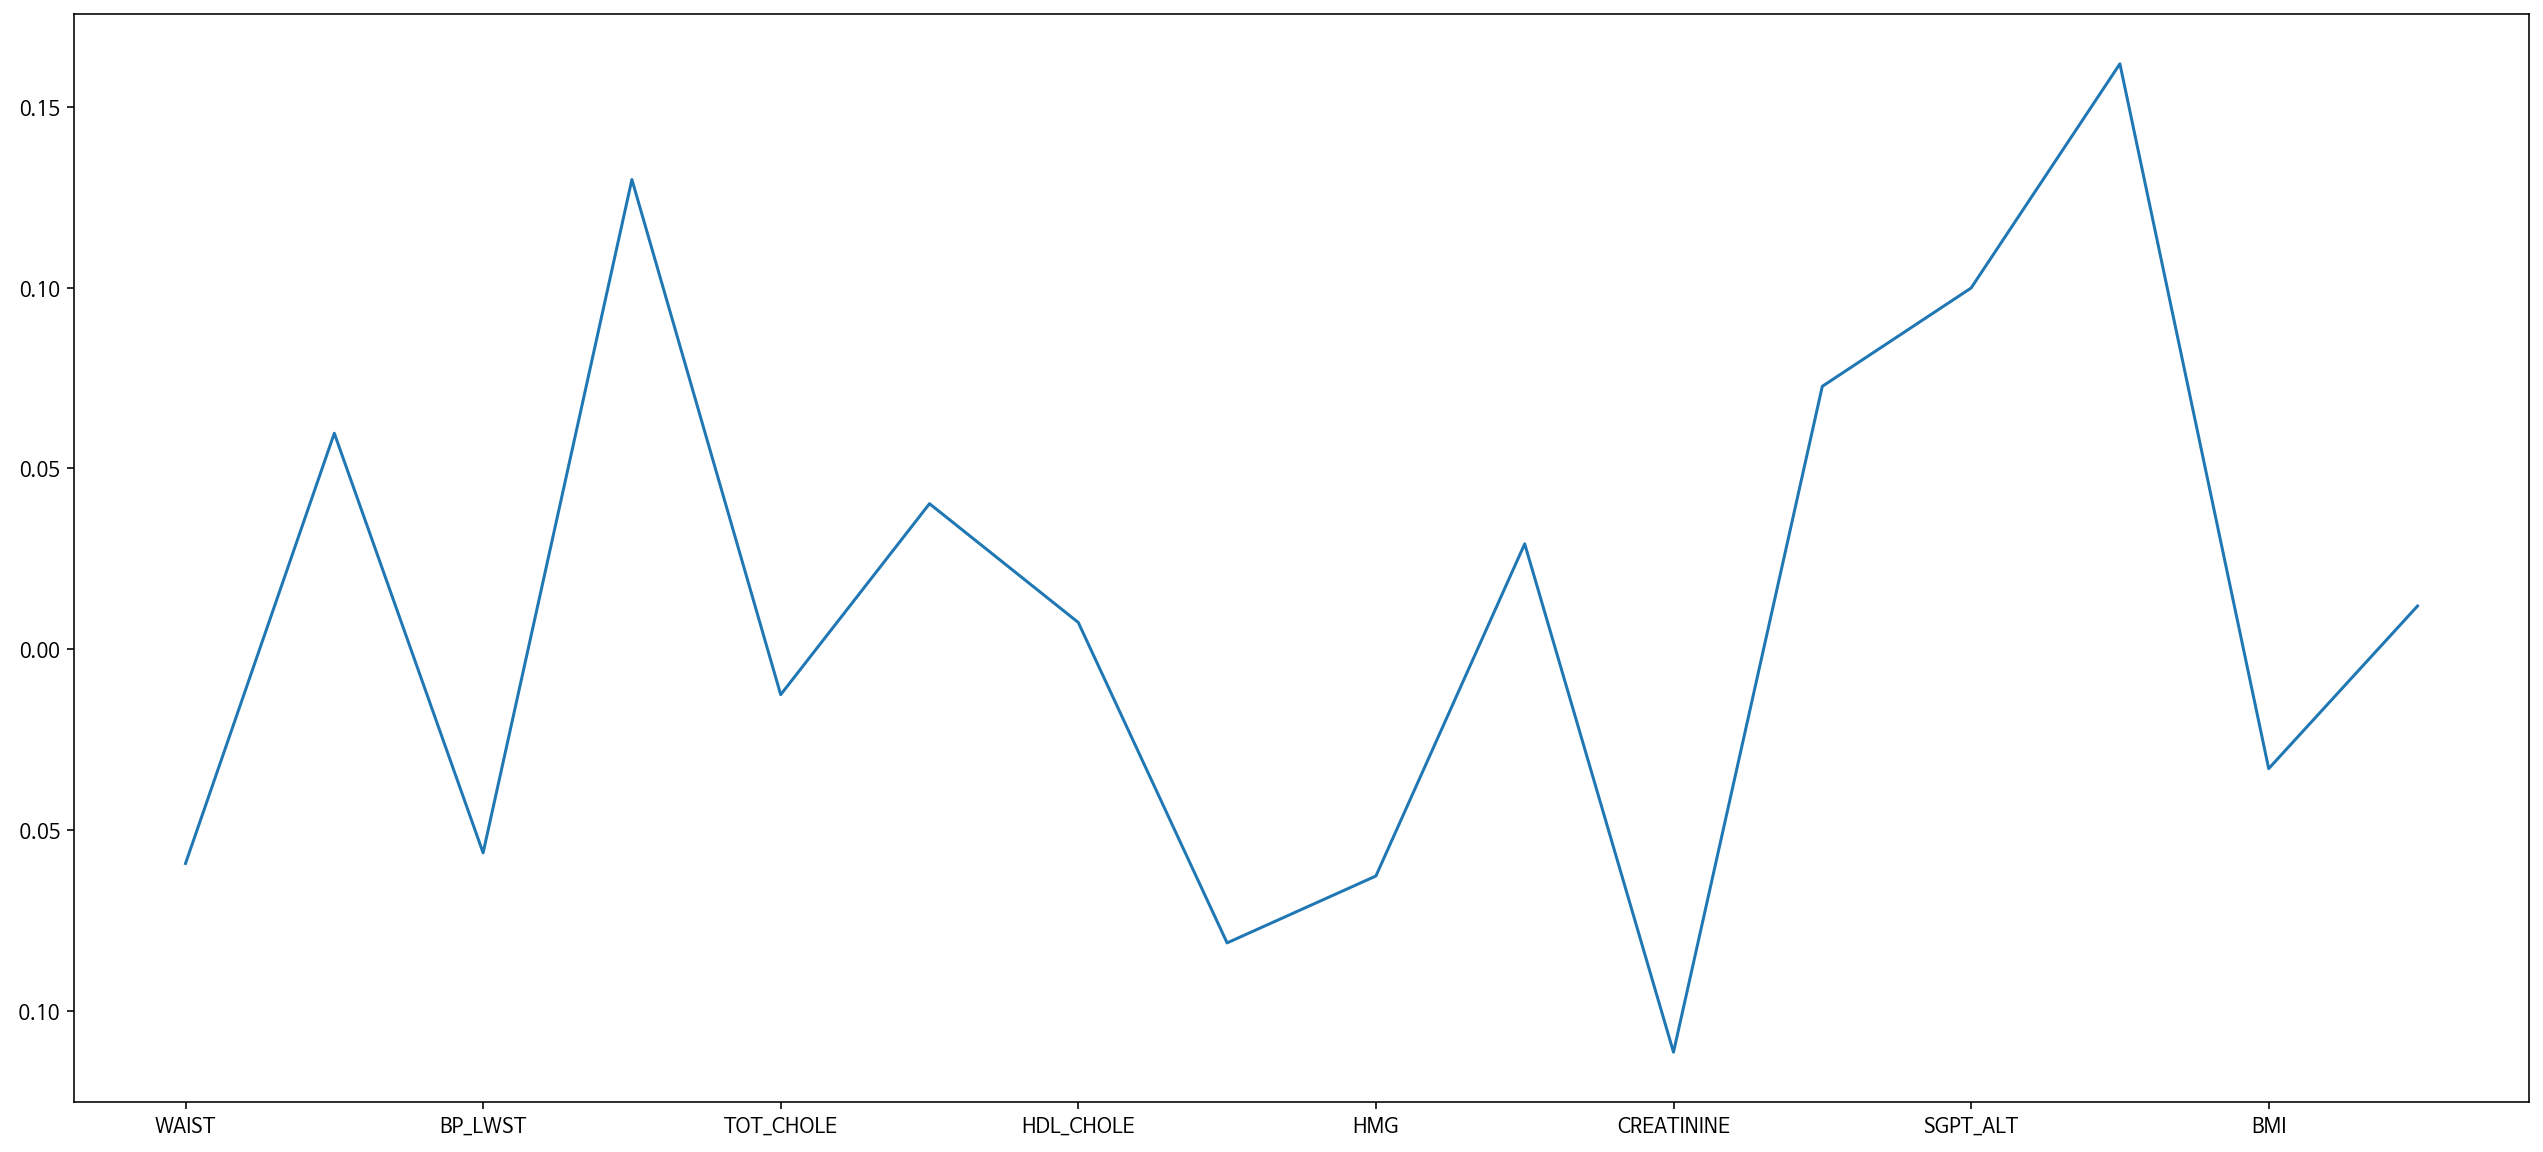

In [ ]:
fig, ax = plt.subplots( figsize=(22,10))
temp2_log1p_scaled.mean().plot()

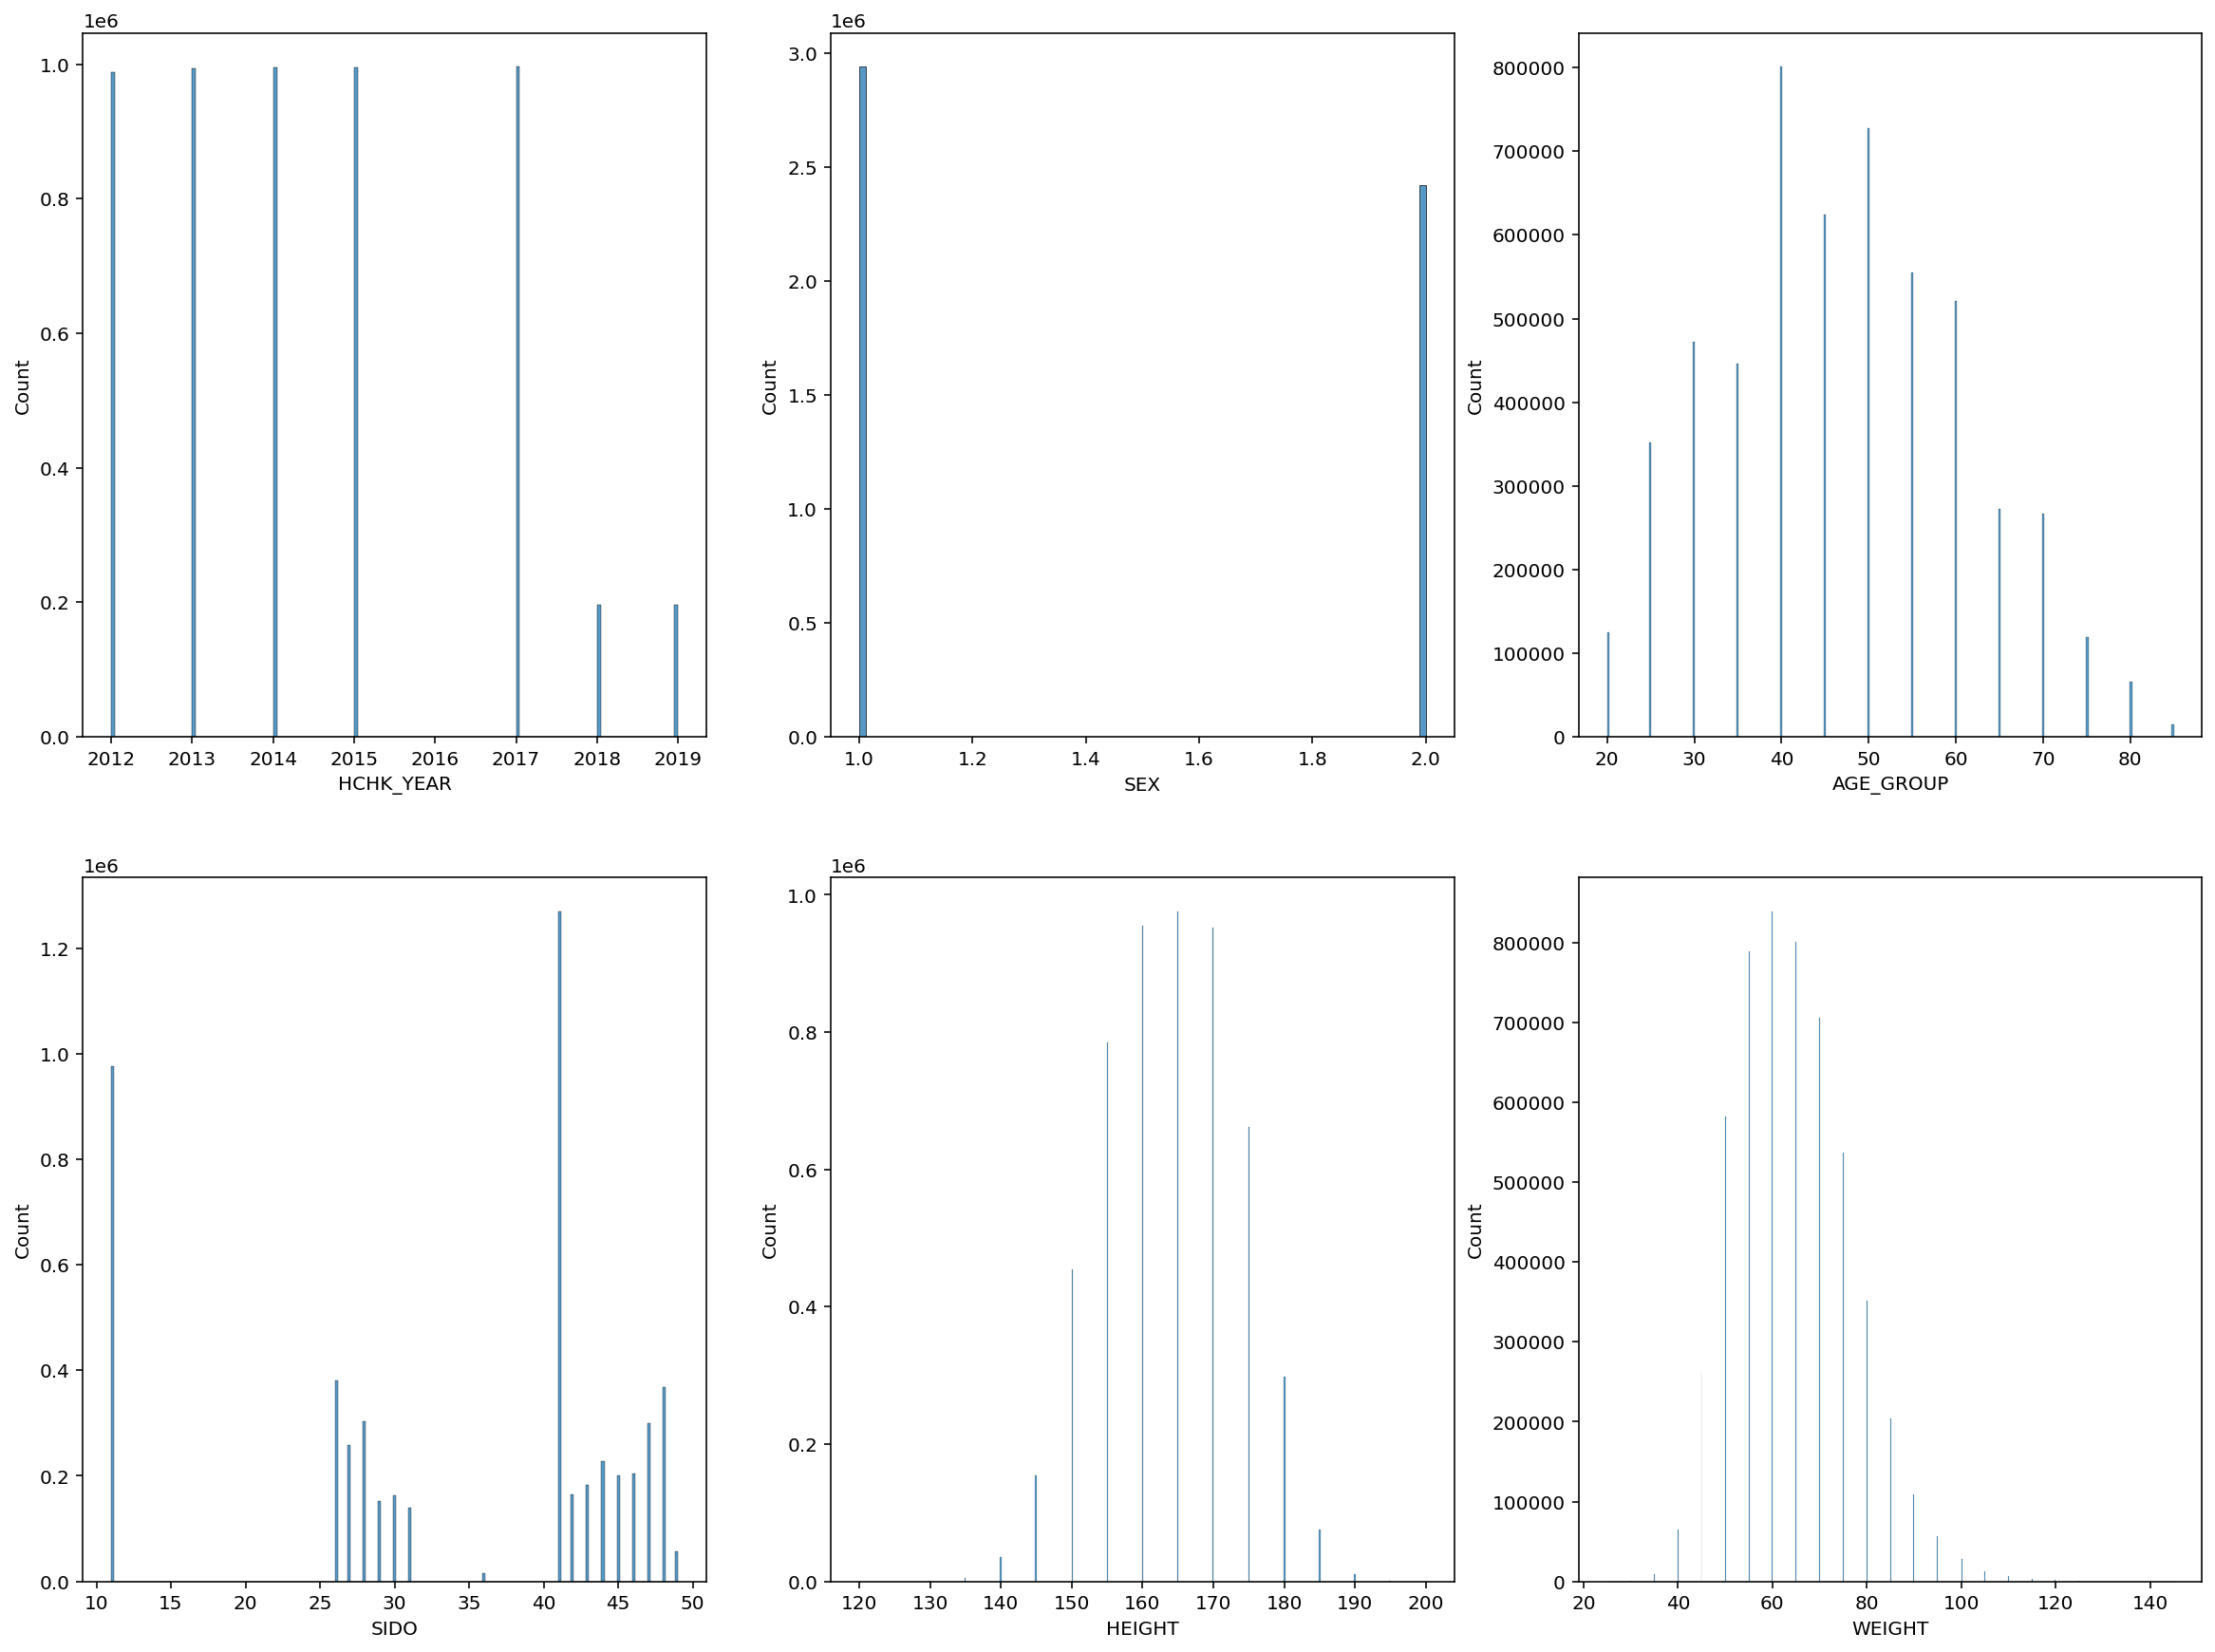

In [ ]:
#컬럼30개 탐색
fig, ax = plt.subplots(2,3, figsize=(20,15))
sns.histplot(temp1["HCHK_YEAR"], ax=ax[0,0])
sns.histplot(temp1["SEX"], ax=ax[0,1])
sns.histplot(temp1["AGE_GROUP"], ax=ax[0,2])
sns.histplot(temp1["SIDO"], ax=ax[1,0])
sns.histplot(temp1["HEIGHT"], ax=ax[1,1])
sns.histplot(temp1["WEIGHT"], ax=ax[1,2])
plt.show()

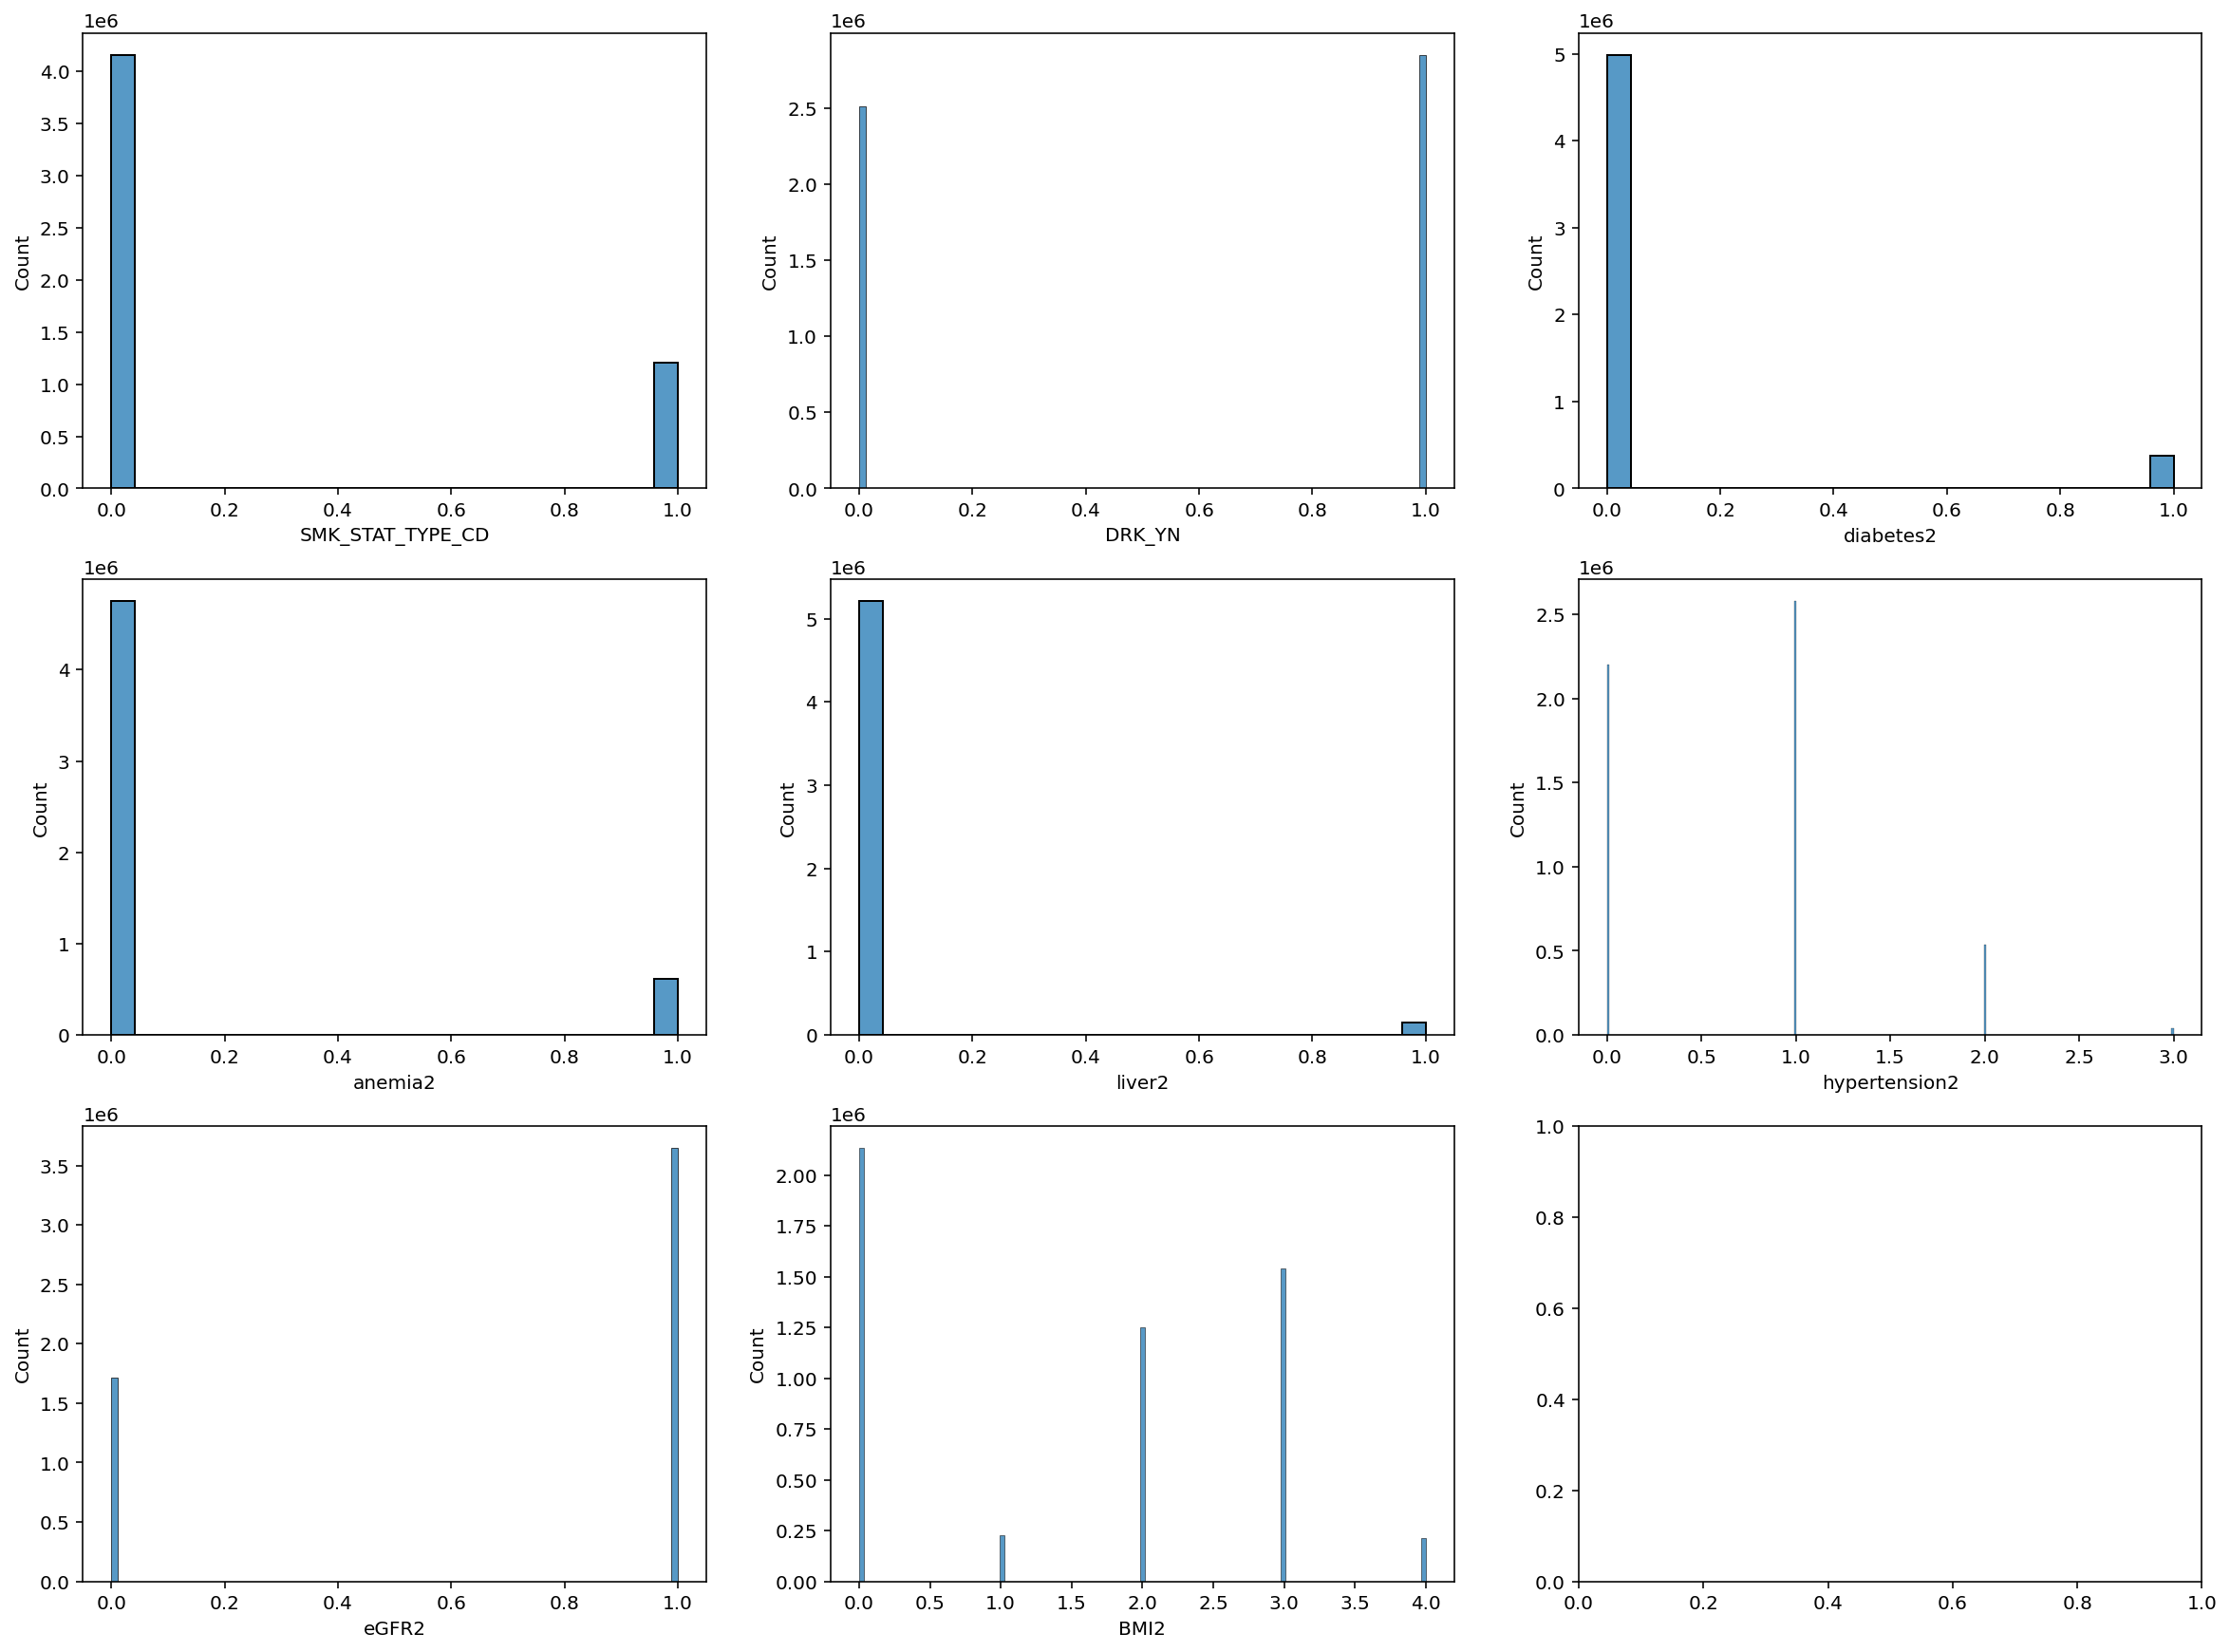

In [ ]:
fig, ax = plt.subplots(3,3, figsize=(20,15))
sns.histplot(temp1["SMK_STAT_TYPE_CD"], ax=ax[0,0])
sns.histplot(temp1["DRK_YN"], ax=ax[0,1])
sns.histplot(temp1["diabetes2"], ax=ax[0,2])
sns.histplot(temp1["anemia2"], ax=ax[1,0])
sns.histplot(temp1["liver2"], ax=ax[1,1])
sns.histplot(temp1["hypertension2"], ax=ax[1,2])
sns.histplot(temp1["eGFR2"], ax=ax[2,0])
sns.histplot(temp1["BMI2"], ax=ax[2,1])
plt.show()

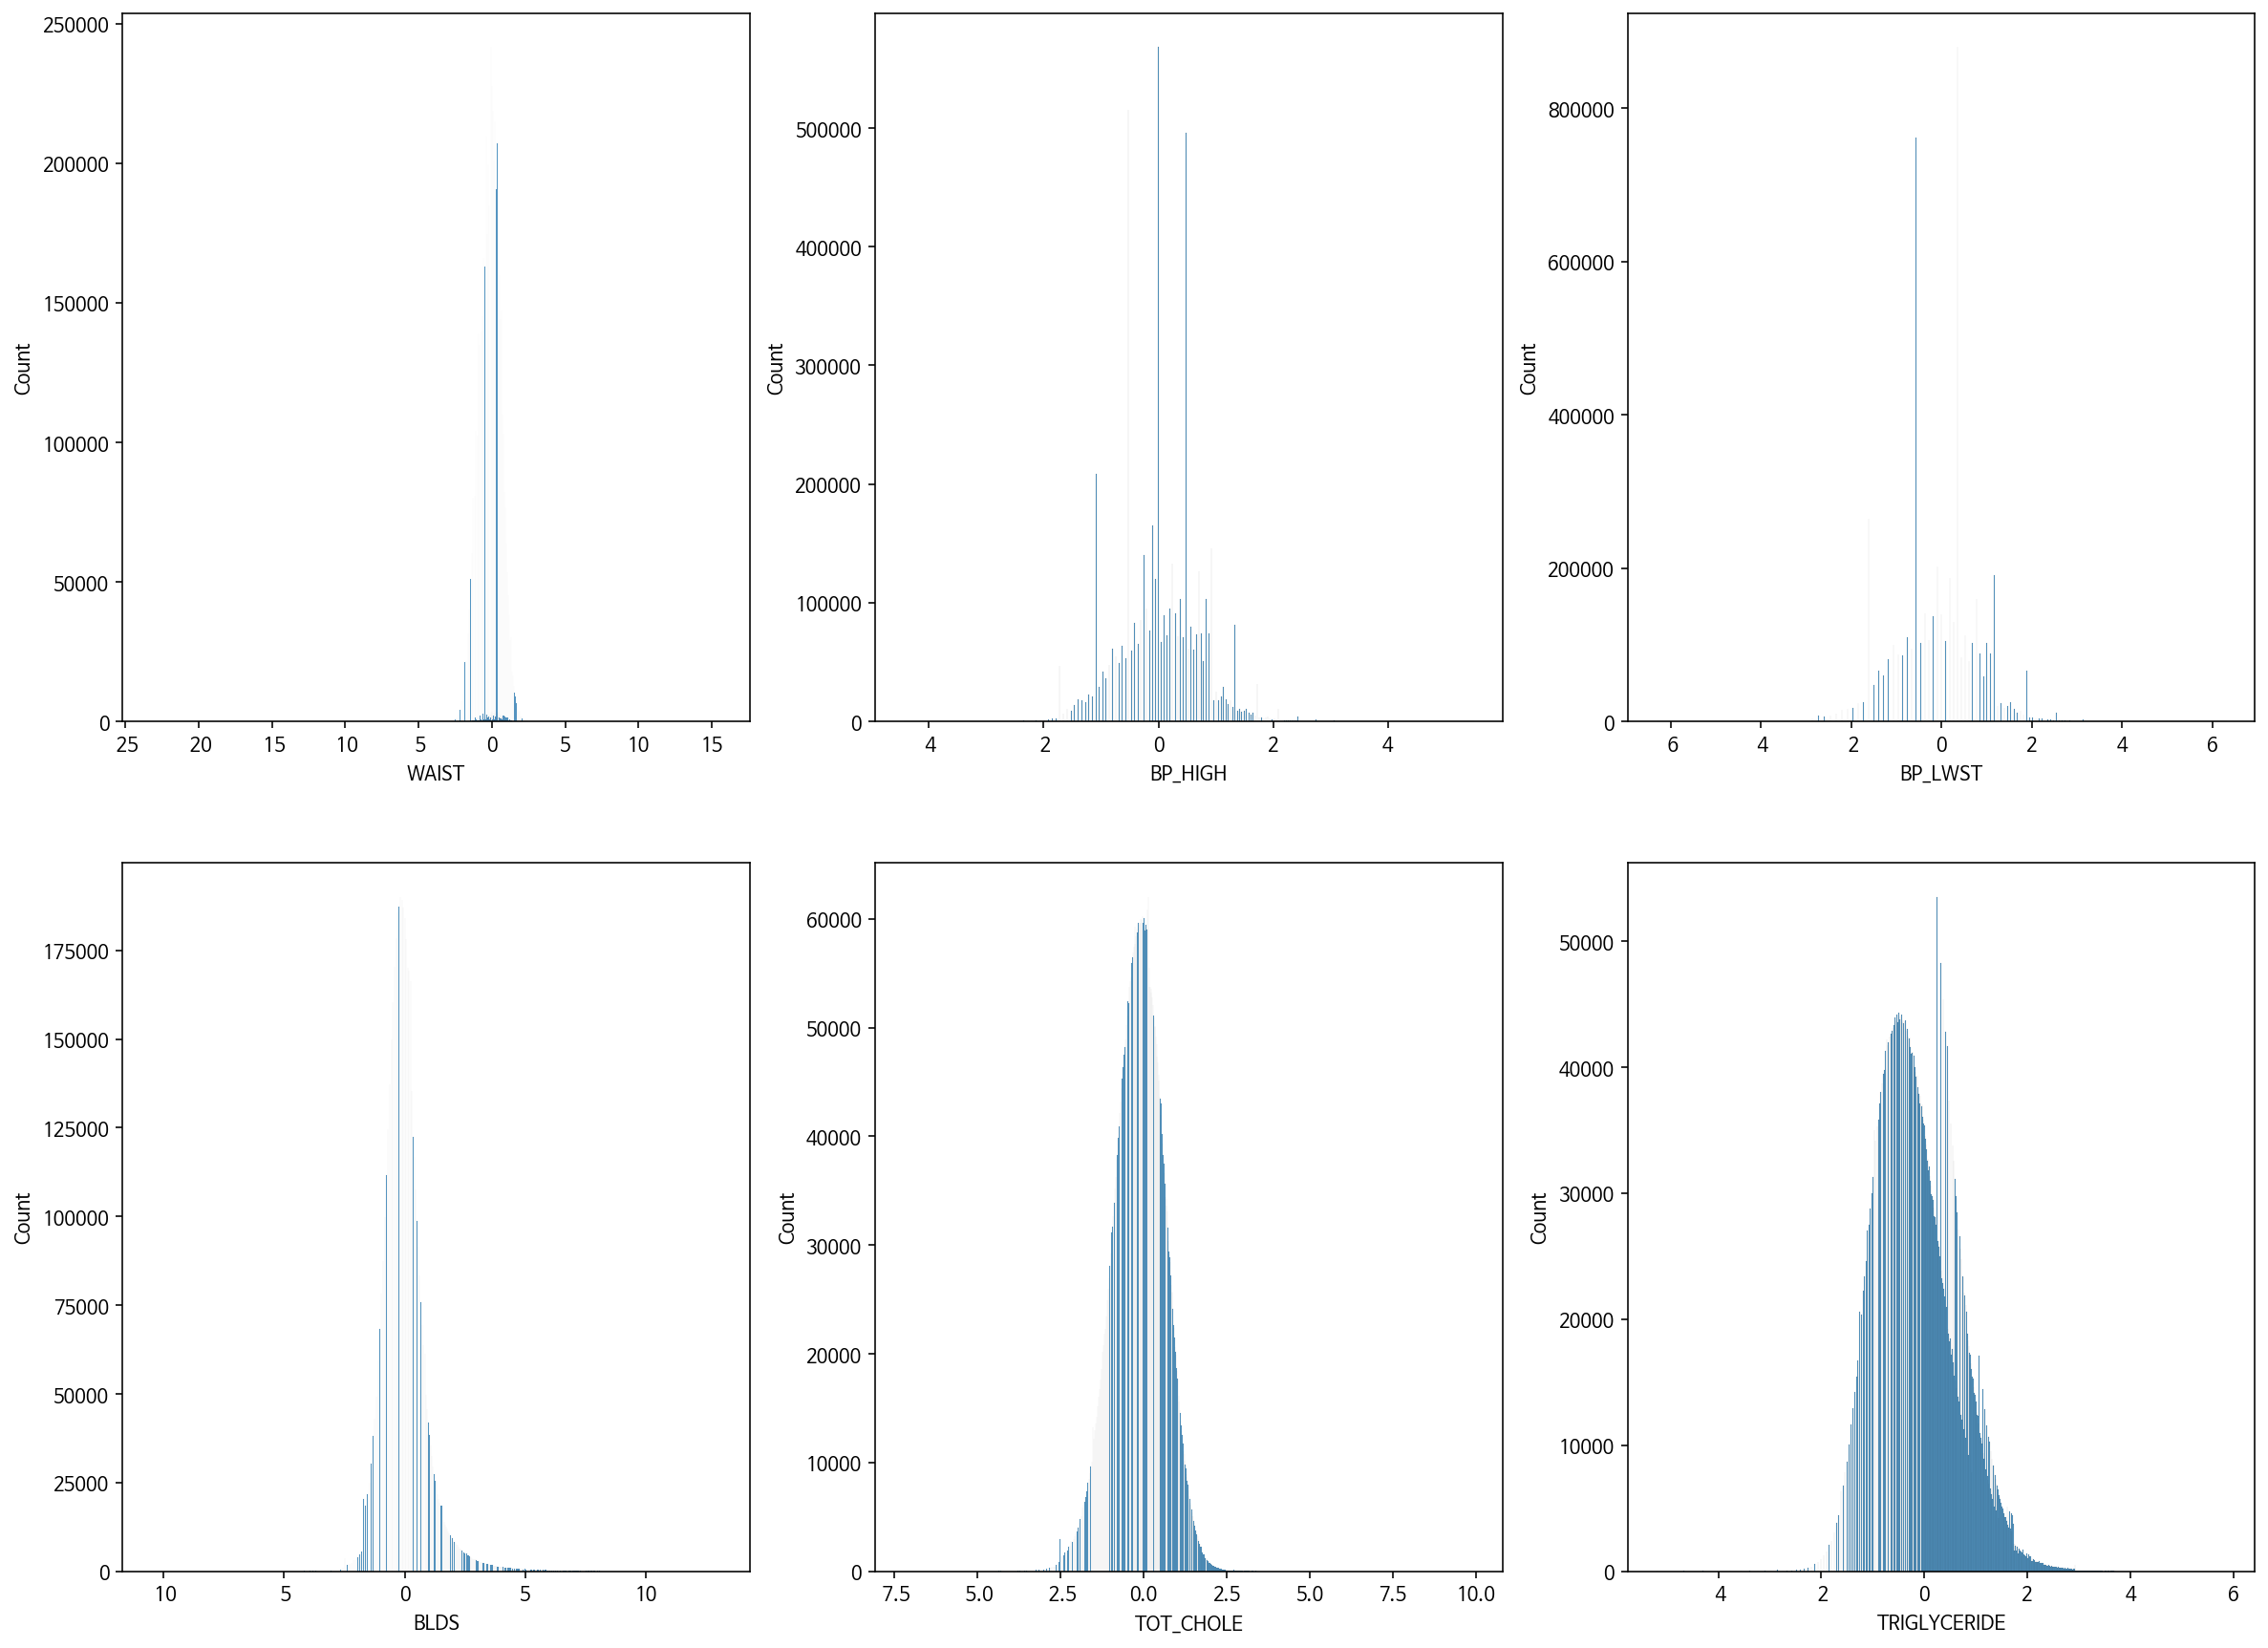

In [ ]:
################################################temp2
fig, ax = plt.subplots(2,3, figsize=(20,15))
sns.histplot(temp2_log1p_scaled["WAIST"], ax=ax[0,0])
sns.histplot(temp2_log1p_scaled["BP_HIGH"], ax=ax[0,1])
sns.histplot(temp2_log1p_scaled["BP_LWST"], ax=ax[0,2])
sns.histplot(temp2_log1p_scaled["BLDS"], ax=ax[1,0])
sns.histplot(temp2_log1p_scaled["TOT_CHOLE"], ax=ax[1,1])
sns.histplot(temp2_log1p_scaled["TRIGLYCERIDE"], ax=ax[1,2])
plt.show()

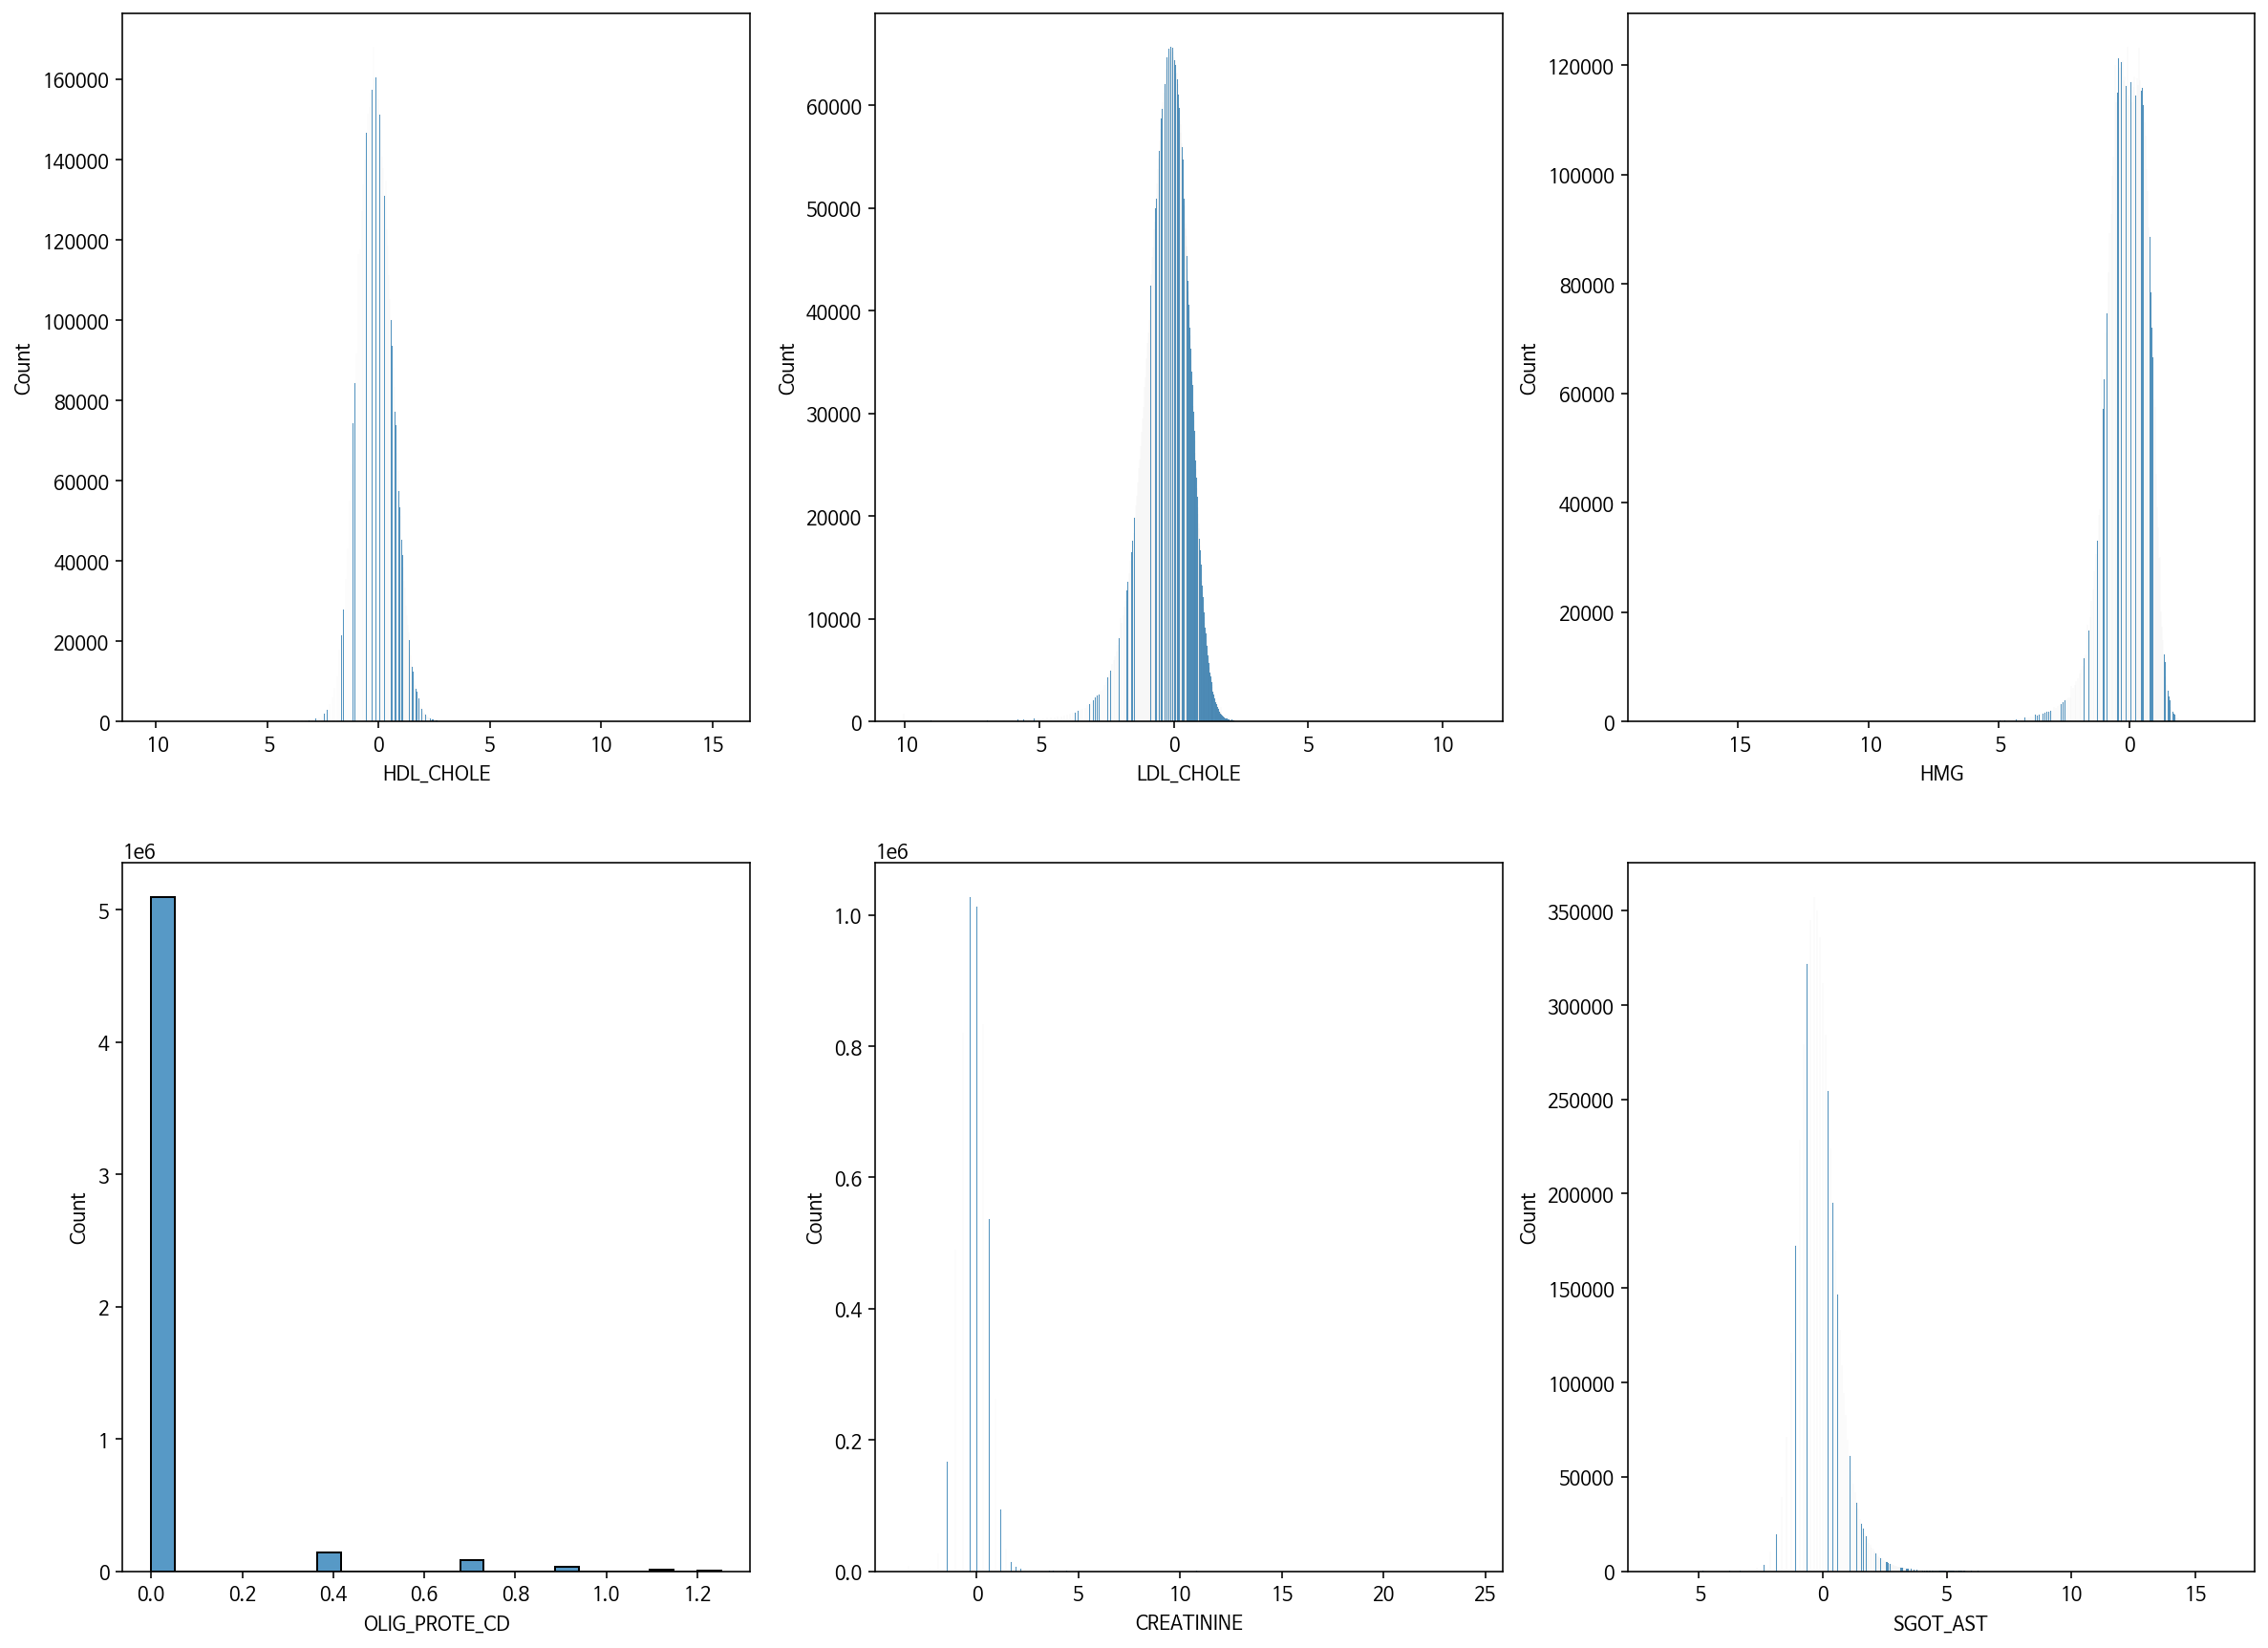

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(20,15))
sns.histplot(temp2_log1p_scaled["HDL_CHOLE"], ax=ax[0,0])
sns.histplot(temp2_log1p_scaled["LDL_CHOLE"], ax=ax[0,1])
sns.histplot(temp2_log1p_scaled["HMG"], ax=ax[0,2])
sns.histplot(temp2_log1p_scaled["OLIG_PROTE_CD"], ax=ax[1,0])
sns.histplot(temp2_log1p_scaled["CREATININE"], ax=ax[1,1])
sns.histplot(temp2_log1p_scaled["SGOT_AST"], ax=ax[1,2])
plt.show()

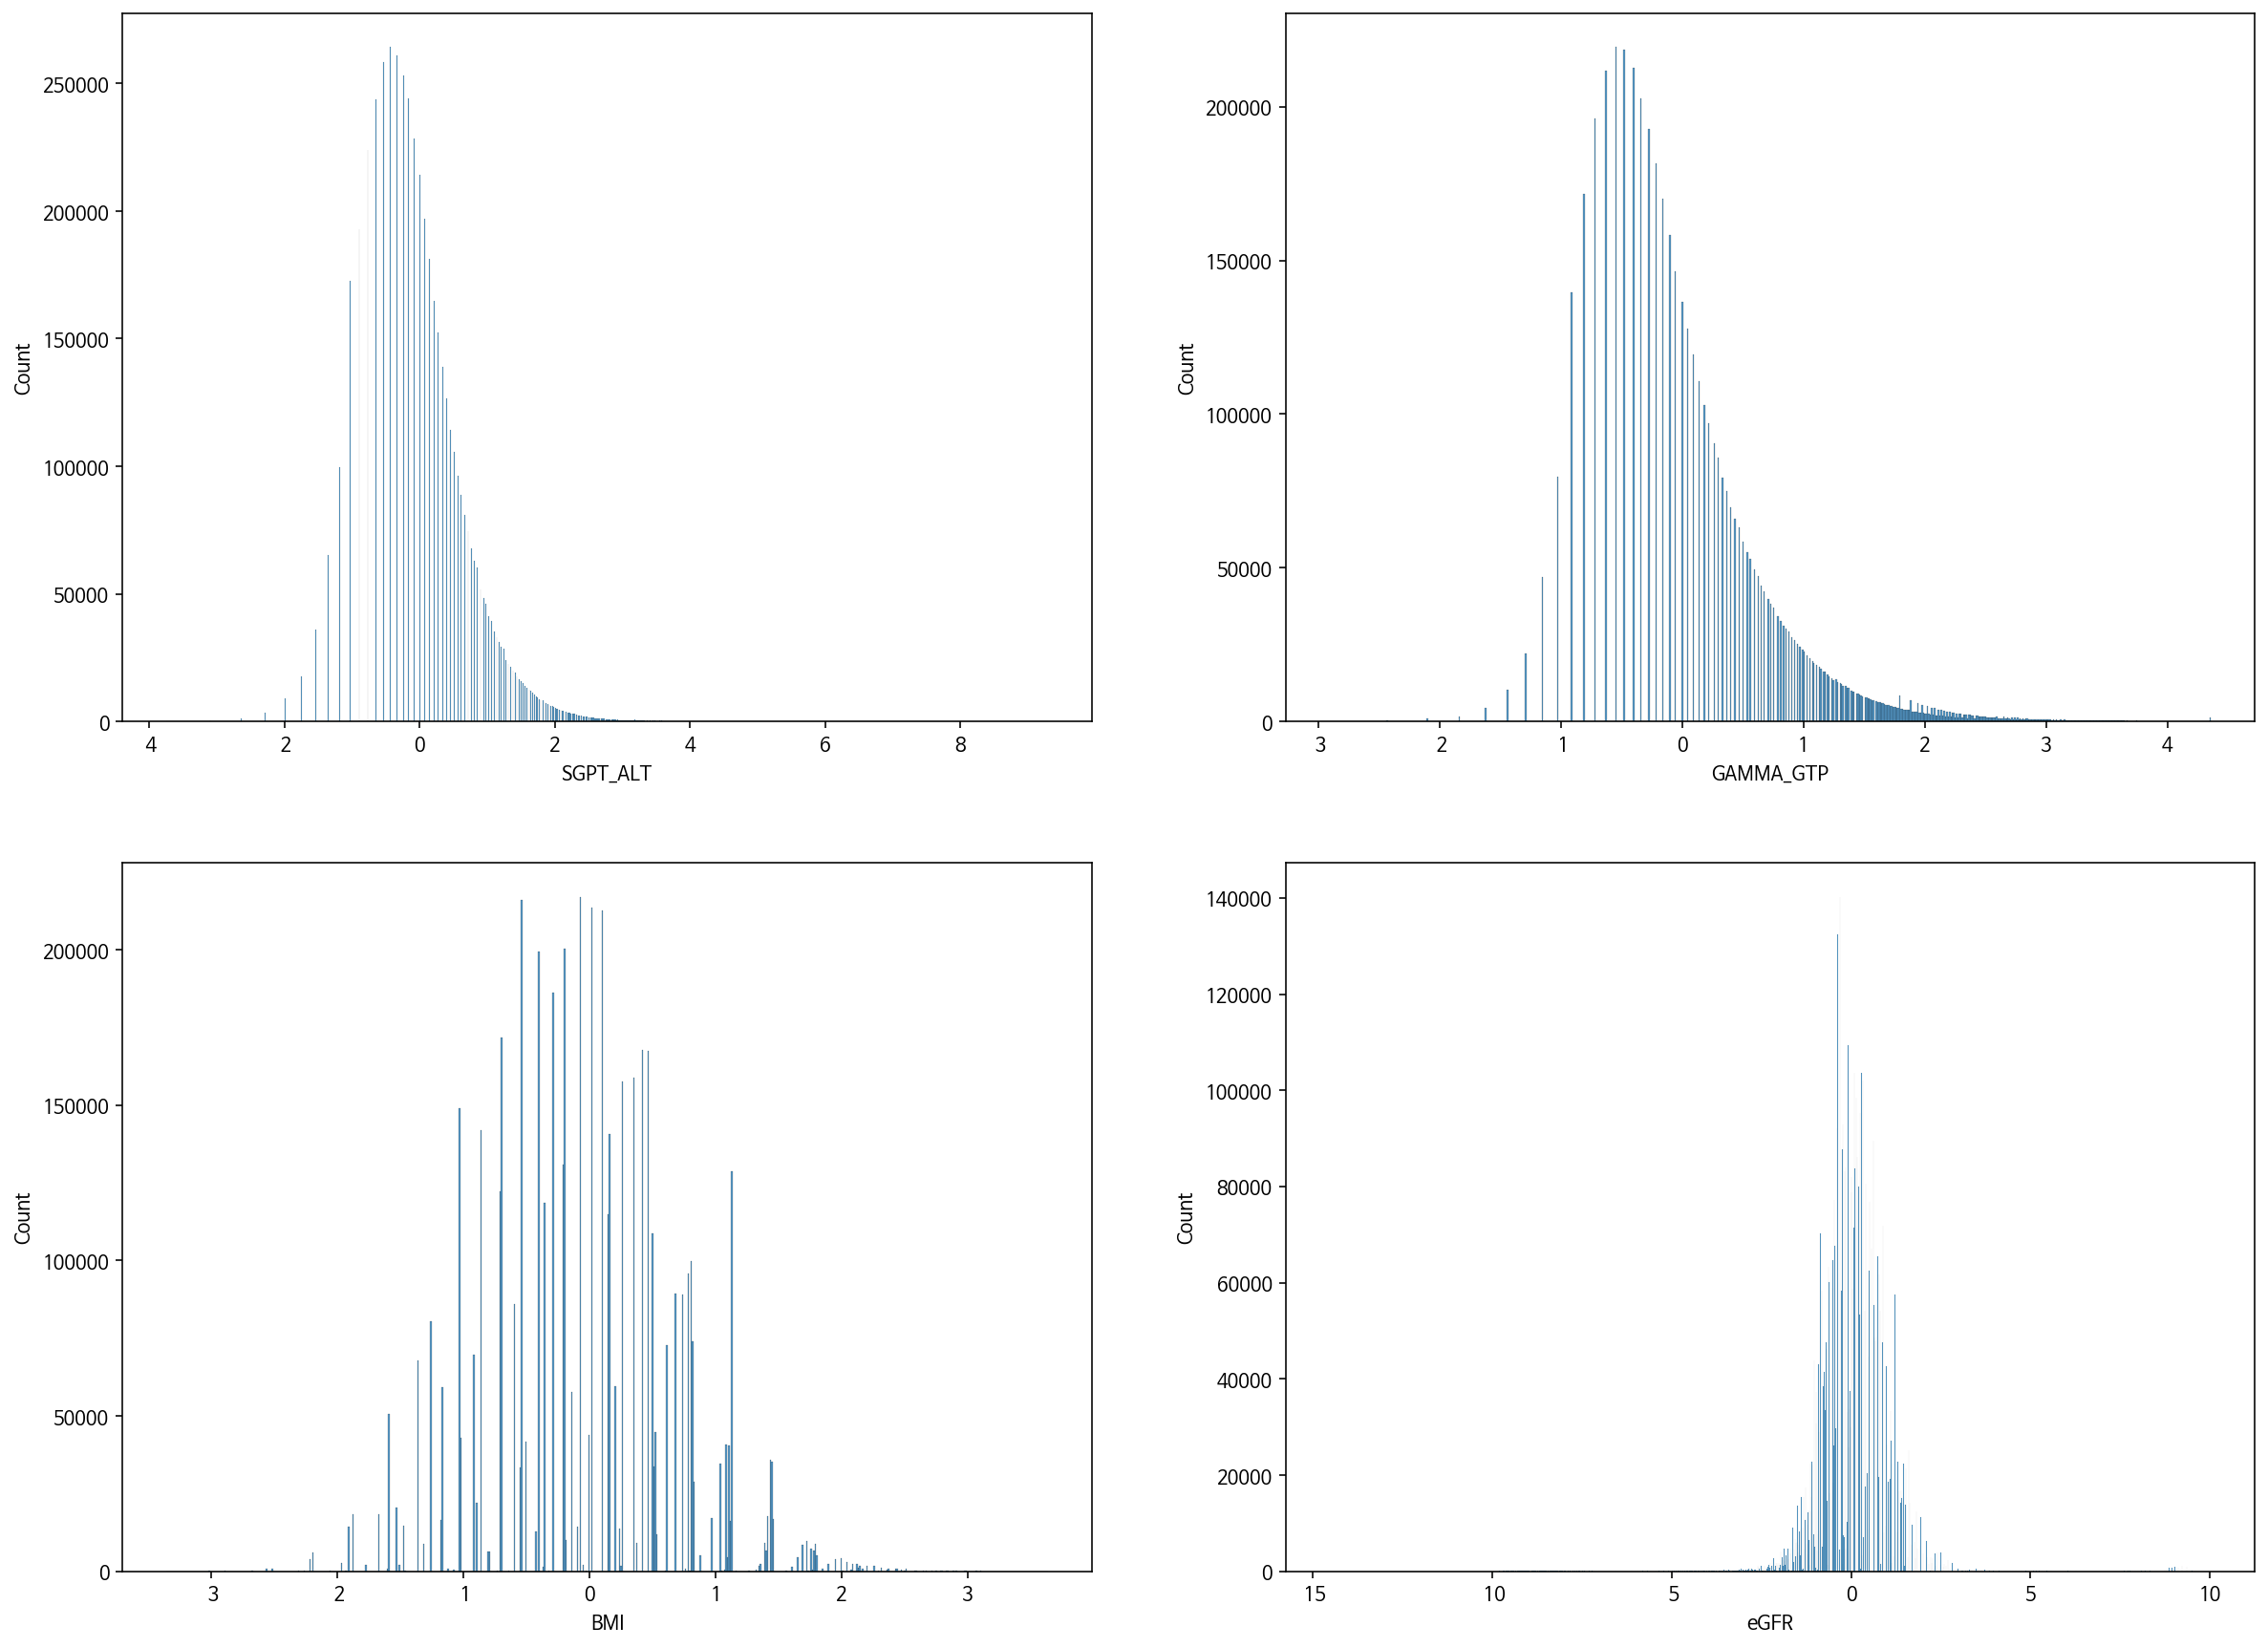

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(20,15))
sns.histplot(temp2_log1p_scaled["SGPT_ALT"], ax=ax[0,0])
sns.histplot(temp2_log1p_scaled["GAMMA_GTP"], ax=ax[0,1])
sns.histplot(temp2_log1p_scaled["BMI"], ax=ax[1,0])
sns.histplot(temp2_log1p_scaled["eGFR"], ax=ax[1,1])
plt.show()

In [ ]:
temp1.columns

Index(['HCHK_YEAR', 'SEX', 'AGE_GROUP', 'SIDO', 'HEIGHT', 'WEIGHT',
       'SMK_STAT_TYPE_CD', 'DRK_YN', 'diabetes2', 'anemia2', 'liver2',
       'hypertension2', 'eGFR2', 'BMI2'],
      dtype='object')

In [ ]:
########################################################################
temp1 = temp1.astype('float')
X=temp1[['SEX', 'AGE_GROUP','HEIGHT', 'WEIGHT','SMK_STAT_TYPE_CD', 'DRK_YN']]
Y=temp1[['diabetes2', 'anemia2', 'liver2','hypertension2', 'eGFR2', 'BMI2']]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(temp1['AGE_GROUP'].nunique())
print(temp1['HEIGHT'].nunique())
print(temp1['WEIGHT'].nunique())

14
17
25


In [ ]:
Y.dtypes

diabetes2        float64
anemia2          float64
liver2           float64
hypertension2    float64
eGFR2            float64
BMI2             float64
dtype: object

In [ ]:
############################################
Y_0 = temp1[['diabetes2']]
Y_1 = temp1[['anemia2']]
Y_2 = temp1[['liver2']]
Y_3 = temp1[['hypertension2']]
Y_4 = temp1[['eGFR2']]
Y_5 = temp1[['BMI2']]

In [ ]:
#다양한 모델 
from sklearn.linear_model import LogisticRegression #이진분류
from sklearn.neighbors import KNeighborsClassifier #새로운 데이터의 분류 결과가 K 개 최근접 이웃의 클래스에 의해서 결정되며, 데이터는 가장 많이 할당되는 클래스로 분류하게 된다.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier #GBM보다 빠름
from sklearn.svm import SVC #이진분류 #SVM(Support Vector Machine) #새로운 데이터가 어느 카테고리에 속할지 판단하는 비확률적 이진 선형 분류 모델을 만듦. #경계로 표현되는 데이터들 중 가장 큰 폭을 가진 경계를 찾는 알고리즘.
from sklearn.linear_model import SGDClassifier #stochastic gradient descent (SGD): 확률적 경사 하강법 
from lightgbm import LGBMClassifier #XGB보다 빠른 부스팅

#모델 저장
from joblib import dump, load

In [ ]:
############################################################################모델 불러오기
model_diabetes=load('/content/drive/MyDrive/test/diabetes.pkl')
model_anemia=load('/content/drive/MyDrive/test/anemia.pkl')
model_liver=load('/content/drive/MyDrive/test/liver.pkl')
model_hypertension=load('/content/drive/MyDrive/test/hypertension.pkl')
model_eGFR=load('/content/drive/MyDrive/test/eGFR.pkl')
model_BMI=load('/content/drive/MyDrive/test/BMI.pkl')

In [ ]:
Y_0.nunique()

diabetes2    2
dtype: int64

In [ ]:
#데이터나누기 당뇨 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y_0,test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
model = LogisticRegression()
model.fit(X_train, y_train)
print('train성능:', model.score(X_train,y_train))
print('test성능:', model.score(X_test,y_test))
#모델 저장
from joblib import dump, load
dump(model, '/content/drive/MyDrive/test/diabetes.pkl')#모델저장하기

train성능: 0.930019743470712
test성능: 0.9298892576158694


['/content/drive/MyDrive/test/diabetes.pkl']

In [ ]:
#당뇨모델 불러오기
model_diabetes=load('/content/drive/MyDrive/test/diabetes.pkl')
#값 입력
o=input("성별(남,녀:0,1)과 나이(5세단위),키(5cm단위),몸무게(5kg단위),흡연여부(안핌,핌:0,1),음주여부(안함,함:0,1)를 입력하세요: ").split()
dfv=pd.DataFrame([o],columns=['SEX', 'AGE_GROUP','HEIGHT', 'WEIGHT','SMK_STAT_TYPE_CD', 'DRK_YN']).astype('category')
dfa=pd.get_dummies(dfv)
dfa
print('당뇨 예측 결과: ',model_diabetes.predict(dfa))#예측값
print('당뇨 확률 결과: ',model_diabetes.predict_proba(dfa))#확률값
#print(diabetes.predict_log_proba(dfa))

성별(남,녀:0,1)과 나이(5세단위),키(5cm단위),몸무게(5kg단위),흡연여부(안핌,핌:0,1),음주여부(안함,함:0,1)를 입력하세요: 1 25 170 60 1 1
당뇨 예측 결과:  [0.]
당뇨 확률 결과:  [[0.59925415 0.40074585]]


In [ ]:
Y_1.nunique()

anemia2    2
dtype: int64

In [ ]:
#데이터나누기 빈혈
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y_1,test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
model = LogisticRegression()
model.fit(X_train, y_train)
print('train성능:', model.score(X_train,y_train))
print('test성능:', model.score(X_test,y_test))
#모델 저장
from joblib import dump, load
dump(model, '/content/drive/MyDrive/test/anemia.pkl')#모델저장하기

train성능: 0.8010386562401539
test성능: 0.8007053457126166


['/content/drive/MyDrive/test/anemia.pkl']

In [ ]:
#빈혈 모델 불러오기
model_anemia=load('/content/drive/MyDrive/test/anemia.pkl')
#값 입력
o=input("성별(남,녀:0,1)과 나이(5세단위),키(5cm단위),몸무게(5kg단위),흡연여부(안핌,핌:0,1),음주여부(안함,함:0,1)를 입력하세요: ").split()
dfv=pd.DataFrame([o],columns=['SEX', 'AGE_GROUP','HEIGHT', 'WEIGHT','SMK_STAT_TYPE_CD', 'DRK_YN']).astype('category')
dfa=pd.get_dummies(dfv)
dfa
print('빈혈 예측 결과: ',model_anemia.predict(dfa))#예측값
print('빈혈 확률 결과: ',model_anemia.predict_proba(dfa))#확률값

성별(남,녀:0,1)과 나이(5세단위),키(5cm단위),몸무게(5kg단위),흡연여부(안핌,핌:0,1),음주여부(안함,함:0,1)를 입력하세요: 1 25 170 60 1 1
빈혈 예측 결과:  [0.]
빈혈 확률 결과:  [[0.79268187 0.20731813]]


In [ ]:
Y_2.nunique()

liver2    2
dtype: int64

In [ ]:
#데이터나누기 간수치
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y_2,test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
model = LogisticRegression()
model.fit(X_train, y_train)
print('train성능:', model.score(X_train,y_train))
print('test성능:', model.score(X_test,y_test))
#모델 저장
from joblib import dump, load
dump(model, '/content/drive/MyDrive/test/liver.pkl')#모델저장하기

train성능: 0.9962116399918075
test성능: 0.9961743540027592


['/content/drive/MyDrive/test/liver.pkl']

In [ ]:
#간수치 모델 불러오기
model_liver=load('/content/drive/MyDrive/test/liver.pkl')
#값 입력
o=input("성별(남,녀:0,1)과 나이(5세단위),키(5cm단위),몸무게(5kg단위),흡연여부(안핌,핌:0,1),음주여부(안함,함:0,1)를 입력하세요: ").split()
dfv=pd.DataFrame([o],columns=['SEX', 'AGE_GROUP','HEIGHT', 'WEIGHT','SMK_STAT_TYPE_CD', 'DRK_YN']).astype('category')
dfa=pd.get_dummies(dfv)
dfa
print('간수치 예측 결과: ',model_liver.predict(dfa))#예측값
print('간수치 확률 결과: ',model_liver.predict_proba(dfa))#확률값

성별(남,녀:0,1)과 나이(5세단위),키(5cm단위),몸무게(5kg단위),흡연여부(안핌,핌:0,1),음주여부(안함,함:0,1)를 입력하세요: 1 25 170 60 1 1
간수치 예측 결과:  [1.]
간수치 확률 결과:  [[0.10683644 0.89316356]]


In [ ]:
Y_3.nunique()

hypertension2    4
dtype: int64

In [ ]:
#데이터나누기 고혈압
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y_3,test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
model = LGBMClassifier()
model.fit(X_train, y_train)
print('train성능:', model.score(X_train,y_train))
print('test성능:', model.score(X_test,y_test))
#모델 저장
from joblib import dump, load
dump(model, '/content/drive/MyDrive/test/hypertension.pkl')#모델저장하기

train성능: 0.5658601753181847
test성능: 0.5655704289247673


['/content/drive/MyDrive/test/hypertension.pkl']

In [ ]:
#고혈압 모델 불러오기
model_hypertension=load('/content/drive/MyDrive/test/hypertension.pkl')
#값 입력
o=input("성별(남,녀:0,1)과 나이(5세단위),키(5cm단위),몸무게(5kg단위),흡연여부(안핌,핌:0,1),음주여부(안함,함:0,1)를 입력하세요: ").split()
dfv=pd.DataFrame([o],columns=['SEX', 'AGE_GROUP','HEIGHT', 'WEIGHT','SMK_STAT_TYPE_CD', 'DRK_YN']).astype('category')
dfa=pd.get_dummies(dfv)
dfa
print('고혈압 예측 결과: ',model_hypertension.predict(dfa))#예측값
print('고혈압 확률 결과: ',model_hypertension.predict_proba(dfa))#확률값

성별(남,녀:0,1)과 나이(5세단위),키(5cm단위),몸무게(5kg단위),흡연여부(안핌,핌:0,1),음주여부(안함,함:0,1)를 입력하세요: 1 25 170 60 1 1
고혈압 예측 결과:  [0.]
고혈압 확률 결과:  [[8.56502604e-01 1.37510665e-01 5.26356855e-03 7.23161949e-04]]


In [ ]:
Y_4.nunique()

eGFR2    2
dtype: int64

In [ ]:
#데이터나누기 신장수치
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y_4,test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
model = LogisticRegression()
model.fit(X_train, y_train)
print('train성능:', model.score(X_train,y_train))
print('test성능:', model.score(X_test,y_test))
#모델 저장
from joblib import dump, load
dump(model, '/content/drive/MyDrive/test/eGFR.pkl')#모델저장하기

train성능: 0.6120350742903683
test성능: 0.6116497010825659


['/content/drive/MyDrive/test/eGFR.pkl']

In [ ]:
#신장수치 모델 불러오기
model_eGFR=load('/content/drive/MyDrive/test/eGFR.pkl')
#값 입력
o=input("성별(남,녀:0,1)과 나이(5세단위),키(5cm단위),몸무게(5kg단위),흡연여부(안핌,핌:0,1),음주여부(안함,함:0,1)를 입력하세요: ").split()
dfv=pd.DataFrame([o],columns=['SEX', 'AGE_GROUP','HEIGHT', 'WEIGHT','SMK_STAT_TYPE_CD', 'DRK_YN']).astype('category')
dfa=pd.get_dummies(dfv)
dfa
print('신장수치 예측 결과: ',model_eGFR.predict(dfa))#예측값
print('신장수치 확률 결과: ',model_eGFR.predict_proba(dfa))#확률값

성별(남,녀:0,1)과 나이(5세단위),키(5cm단위),몸무게(5kg단위),흡연여부(안핌,핌:0,1),음주여부(안함,함:0,1)를 입력하세요: 1 25 170 60 1 1
신장수치 예측 결과:  [0.]
신장수치 확률 결과:  [[0.68117967 0.31882033]]


In [ ]:
Y_5.nunique()

BMI2    5
dtype: int64

In [ ]:
#데이터나누기 비만
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y_5,test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
model = LGBMClassifier()
model.fit(X_train, y_train)
print('train성능:', model.score(X_train,y_train))
print('test성능:', model.score(X_test,y_test))
#모델 저장
from joblib import dump, load
dump(model, '/content/drive/MyDrive/test/BMI.pkl')#모델저장하기

train성능: 0.9999957386276623
test성능: 0.9999944069502964


['/content/drive/MyDrive/test/BMI.pkl']

In [ ]:
#고혈압 모델 불러오기
model_BMI=load('/content/drive/MyDrive/test/BMI.pkl')
#값 입력
o=input("성별(남,녀:0,1)과 나이(5세단위),키(5cm단위),몸무게(5kg단위),흡연여부(안핌,핌:0,1),음주여부(안함,함:0,1)를 입력하세요: ").split()
dfv=pd.DataFrame([o],columns=['SEX', 'AGE_GROUP','HEIGHT', 'WEIGHT','SMK_STAT_TYPE_CD', 'DRK_YN']).astype('category')
dfa=pd.get_dummies(dfv)
dfa
print('비만 예측 결과: ',model_BMI.predict(dfa))#예측값
print('비만 확률 결과: ',model_BMI.predict_proba(dfa))#확률값

성별(남,녀:0,1)과 나이(5세단위),키(5cm단위),몸무게(5kg단위),흡연여부(안핌,핌:0,1),음주여부(안함,함:0,1)를 입력하세요: 1 25 170 60 1 1
비만 예측 결과:  [1.]
비만 확률 결과:  [[2.52136846e-02 9.73842013e-01 2.44318328e-04 6.86946502e-04
  1.30373859e-05]]


In [ ]:
o=input("성별(남,녀:0,1)과 나이(5세단위),키(5cm단위),몸무게(5kg단위),흡연여부(안핌,핌:0,1),음주여부(안함,함:0,1)를 입력하세요(ex.1 25 170 60 1 1): ").split()
dfv=pd.DataFrame([o],columns=['SEX', 'AGE_GROUP','HEIGHT', 'WEIGHT','SMK_STAT_TYPE_CD', 'DRK_YN']).astype('category')
dfa=pd.get_dummies(dfv)

성별(남,녀:0,1)과 나이(5세단위),키(5cm단위),몸무게(5kg단위),흡연여부(안핌,핌:0,1),음주여부(안함,함:0,1)를 입력하세요(ex.1 25 170 60 1 1): 1 25 170 60 1 1


In [ ]:
dfa

,SEX_1,AGE_GROUP_25,HEIGHT_170,WEIGHT_60,SMK_STAT_TYPE_CD_1,DRK_YN_1
0,1,1,1,1,1,1


In [ ]:
model_diabetes.predict(dfa)[0]

0.0

In [ ]:
#값 입력
def modelpredict() :
  o=input("성별(남,녀:0,1)과 나이(5세단위),키(5cm단위),몸무게(5kg단위),흡연여부(안핌,핌:0,1),음주여부(안함,함:0,1)를 입력하세요(ex.1 25 170 60 1 1): ").split()
  dfv=pd.DataFrame([o],columns=['SEX', 'AGE_GROUP','HEIGHT', 'WEIGHT','SMK_STAT_TYPE_CD', 'DRK_YN']).astype('category')
  dfa=pd.get_dummies(dfv)

  if model_diabetes.predict(dfa).astype('int')[0]==0 :
    print('당뇨 예측 결과 : 정상입니다.')
  elif model_diabetes.predict(dfa).astype('int')[0]==1 :
    print('당뇨가 의심됩니다.')

    if model_anemia.predict(dfa).astype('int')[0]==0 :
      print('빈혈 예측 결과 : 정상입니다.')
    elif model_anemia.predict(dfa).astype('int')[0]==1 :
      print('빈혈이 의심됩니다.')

      if model_liver.predict(dfa).astype('int')[0]==0 :
        print('간수치 예측 결과 : 정상입니다.')
      elif model_liver.predict(dfa).astype('int')[0]==1 :
        print('간수치가 의심됩니다.')

        if model_eGFR.predict(dfa).astype('int')[0]==0 :
          print('신장수치 예측 결과 : 정상입니다.')
        elif model_eGFR.predict(dfa).astype('int')[0]==1 :
          print('신장수치가 의심됩니다.')

          if model_hypertension.predict(dfa).astype('int')[0]==0 :
            print('고혈압 예측 결과 : 정상입니다.')
          elif model_hypertension.predict(dfa).astype('int')[0]==1 :
            print('고혈압 전 단계로 예상됩니다.')
          elif model_hypertension.predict(dfa).astype('int')[0]==2 :
            print('경도 고혈압으로 예상됩니다.')
          elif model_hypertension.predict(dfa).astype('int')[0]==3 :
            print('중등도 이상의 고혈압으로 예상됩니다.')

            if model_BMI.predict(dfa).astype('int')[0]==0 :
              print('비만지수 : 정상입니다.')
            elif model_BMI.predict(dfa).astype('int')[0]==1 :
              print('저체중 입니다.')
            elif model_BMI.predict(dfa).astype('int')[0]==2 :
              print('위험체중(비만 전 단계) 입니다.')
            elif model_BMI.predict(dfa).astype('int')[0]==3 :
              print('1단계 비만 입니다.')
            elif model_BMI.predict(dfa).astype('int')[0]==4 :
              print('2단계 비만 입니다.')

In [ ]:
#예측결과 함수
modelpredict()
#고장남
#고장남
#고장남#고장남


In [ ]:
#예측결과 함수
modelpredict()

성별(남,녀:0,1)과 나이(5세단위),키(5cm단위),몸무게(5kg단위),흡연여부(안핌,핌:0,1),음주여부(안함,함:0,1)를 입력하세요(ex.1 25 170 60 1 1): 0 15 157 111 0 1
당뇨 예측 결과 : 정상입니다.


In [ ]:
#예측결과 함수
modelpredict()


성별(남,녀:0,1)과 나이(5세단위),키(5cm단위),몸무게(5kg단위),흡연여부(안핌,핌:0,1),음주여부(안함,함:0,1)를 입력하세요(ex.1 25 170 60 1 1): 0 20 185 110 0 1
당뇨 예측 결과 : 정상입니다.
빈혈 예측 결과 : 정상입니다.
간수치가 의심됩니다.
신장수치 예측 결과 : 정상입니다.
고혈압 예측 결과 : 정상입니다.
저체중 입니다.


In [ ]:
#예측결과 함수2
modelpredict()

성별(남,녀:0,1)과 나이(5세단위),키(5cm단위),몸무게(5kg단위),흡연여부(안핌,핌:0,1),음주여부(안함,함:0,1)를 입력하세요(ex.1 25 170 60 1 1): 1 25 170 60 0 0
당뇨 예측 결과 : 정상입니다.
빈혈 예측 결과 : 정상입니다.
간수치가 의심됩니다.
신장수치 예측 결과 : 정상입니다.
고혈압 예측 결과 : 정상입니다.
저체중 입니다.


In [ ]:
modelpredict()


성별(남,녀:0,1)과 나이(5세단위),키(5cm단위),몸무게(5kg단위),흡연여부(안핌,핌:0,1),음주여부(안함,함:0,1)를 입력하세요(ex.1 25 170 60 1 1): 2 25 170 60 1 1
당뇨 예측 결과 : 정상입니다.
빈혈 예측 결과 : 정상입니다.
간수치가 의심됩니다.
신장수치 예측 결과 : 정상입니다.
고혈압 예측 결과 : 정상입니다.
저체중 입니다.


In [ ]:
modelpredict()

성별(남,녀:0,1)과 나이(5세단위),키(5cm단위),몸무게(5kg단위),흡연여부(안핌,핌:0,1),음주여부(안함,함:0,1)를 입력하세요(ex.1 25 170 60 1 1): 0 30 160 170 0 0
당뇨 예측 결과 : 정상입니다.
빈혈 예측 결과 : 정상입니다.
간수치가 의심됩니다.
신장수치 예측 결과 : 정상입니다.
고혈압 예측 결과 : 정상입니다.
저체중 입니다.


In [ ]:
#예측결과 함수3
modelpredict()#저체중이 아닌데 잘못나옴. 신뢰도 손봐야.

성별(남,녀:0,1)과 나이,키,몸무게,흡연여부(안핌,핌:0,1),음주여부(안함,함:0,1)를 입력하세요(ex.1 25 170 60 1 1): 0 30 165 105 1 0
당뇨 예측 결과 : 정상입니다.
빈혈 예측 결과 : 정상입니다.
간수치가 의심됩니다.
신장수치 예측 결과 : 정상입니다.
고혈압 예측 결과 : 정상입니다.
저체중 입니다.


In [ ]:
#예측결과 함수4
modelpredict()

성별(남,녀:0,1)과 나이,키,몸무게,흡연여부(안핌,핌:0,1),음주여부(안함,함:0,1)를 입력하세요(ex.1 25 170 60 1 1): 1 17 166 150 1 1
당뇨 예측 결과 : 정상입니다.
빈혈 예측 결과 : 정상입니다.
간수치가 의심됩니다.
신장수치 예측 결과 : 정상입니다.
고혈압 예측 결과 : 정상입니다.
저체중 입니다.
